In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# __SCALLING__

Transform numerical data into same range (typically small). 
<br> Some method may work best with scaling
ex. KNN, Neural Network, Linear Model.
<br>
<br>
Scaling:
- MinMax Scaler
- Standard Scaler
- Robust Scaler

In [2]:
#1. Load dataset

tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


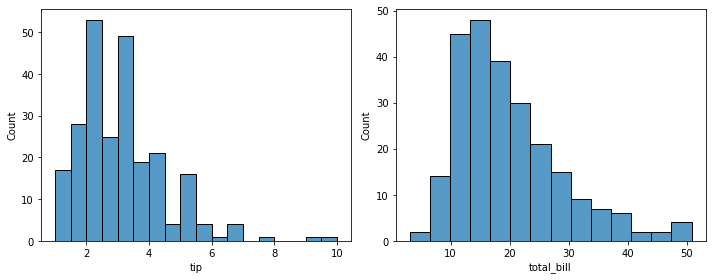

In [3]:
#2. memvisualisasikan data untuk melihat range data

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(tips['tip'])

plt.subplot(1,2,2)
sns.histplot(tips['total_bill'])

plt.tight_layout()
plt.show() 

#terlihat beda range data, perlu dilakukan scalling

In [4]:
#Melihat describe data 

tips[['tip', 'total_bill']].describe()
#(terlihat nilai min dan max kedua variabel jaduh berbeda)

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


from illustration above, you can see the range and descriptive statistics of each variables, tips and total bill. we will transform these variables into smaller range using:
- min max scaler
- standard scaler
- robust scaler

In [5]:
#Import Library

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [6]:
#Menentukan variabel X (best practice)

X = tips[['tip', 'total_bill']]

> ## __MinMax Scaler__

\begin{align}
z_i = \frac{x_i - min(x_i)}{max(x_i) - min(x_i)}
\end{align}

In [7]:
#Melakukan scaling

minmax = MinMaxScaler() #membuat objek
X_minmax = minmax.fit_transform(X) #pake fit&transform karena tidak pake data splitting 
X_minmax = pd.DataFrame(X_minmax, columns=X.columns) #dijadikan df
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [8]:
#Melihat describe hasil scaling minmax

X_minmax.describe()
#min selalu 0, max selalu 1

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


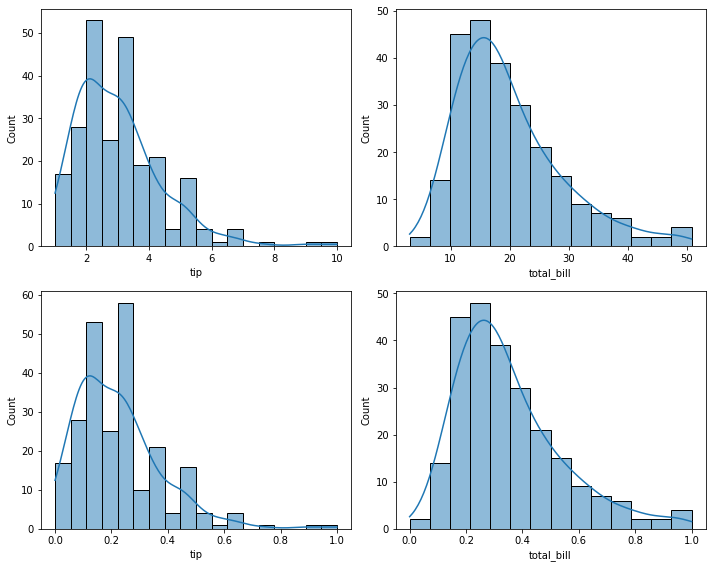

In [9]:
#Membandingkan plot data with scaling dan without scaling

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(2,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(2,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(2,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.tight_layout()
plt.show()

from illustration above, you can see that min max scaler method has transformed each varables into range 0 to 1.

> ## __Standard Scaler__


\begin{align}
z_i = \frac{x_i - \bar{x}}{s}
\end{align}


In [10]:
#Melakukan scalling

standard = StandardScaler() #membuat objek
X_standard = standard.fit_transform(X) #scalling
X_standard = pd.DataFrame(X_standard, columns=X.columns) #dijadikan dataframe
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [11]:
#Melakukan analisis deskriptif

X_standard.describe()
#mean mendekati 0, std mendekati 1
#range diatas 2,5 biasanya outlier

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.846297e-16,-6.597637e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


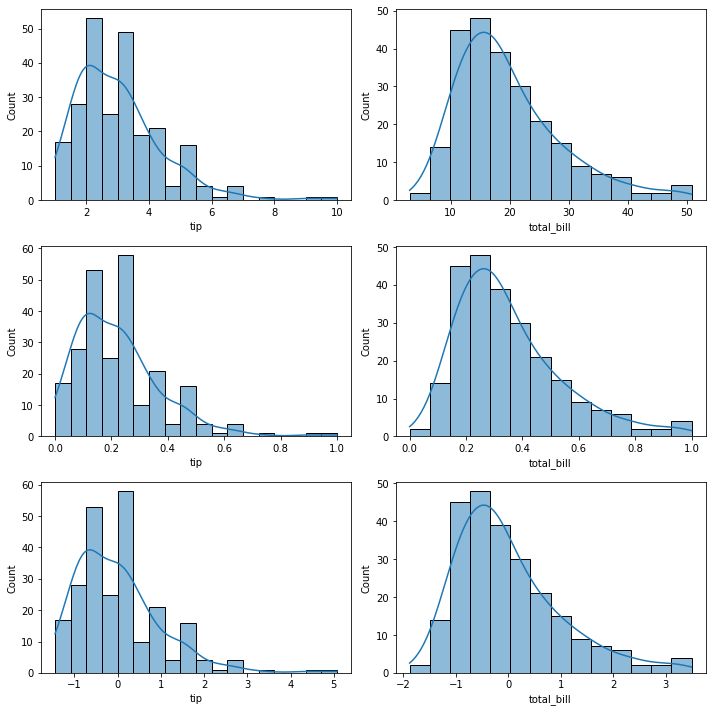

In [12]:
#Membuat plot perbandingan data without scaling, scaling with minmax, and scaling with standard

plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(3,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(3,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(3,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.subplot(3,2,5)
sns.histplot(X_standard['tip'], kde=True)
plt.subplot(3,2,6)
sns.histplot(X_standard['total_bill'], kde=True)

plt.tight_layout()
plt.show()

Terlihat dari grafik, bentuknya sama tapi hanya berbeda di range data

> ## __Robust Scaler__

\begin{align}
z_i = \frac{x_i - Q_1(x_i)}{Q_3(x_i) - Q_1(x_i)}
\end{align}
​
​


In [13]:
#Melakukan scaling

robust = RobustScaler() #membuat objek
X_robust = robust.fit_transform(X) 
X_robust = pd.DataFrame(X_robust, columns=X.columns)
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [14]:
#melakukan analisis deskripstif

X_robust.describe()
#tidak ada range yg dijanjikan robust, tapi mediannya mendekati nol
#terlihat di row 50%

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


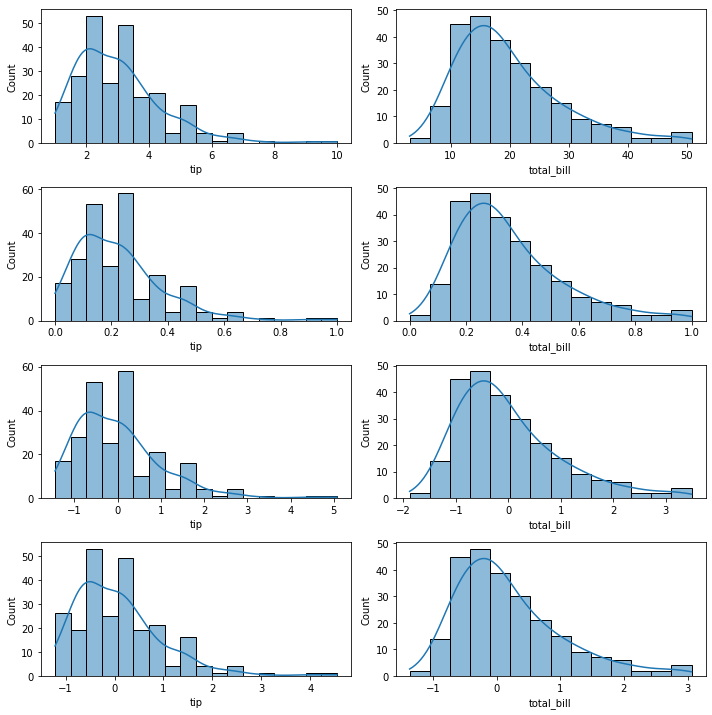

In [15]:
#Membuat plot perbandingan data without scaling, scaling with minmax, standard, dan robust

plt.figure(figsize=(10,10))

plt.subplot(4,2,1)
sns.histplot(tips['tip'], kde=True)
plt.subplot(4,2,2)
sns.histplot(tips['total_bill'], kde=True)

plt.subplot(4,2,3)
sns.histplot(X_minmax['tip'], kde=True)
plt.subplot(4,2,4)
sns.histplot(X_minmax['total_bill'], kde=True)

plt.subplot(4,2,5)
sns.histplot(X_standard['tip'], kde=True)
plt.subplot(4,2,6)
sns.histplot(X_standard['total_bill'], kde=True)

plt.subplot(4,2,7)
sns.histplot(X_robust['tip'], kde=True)
plt.subplot(4,2,8)
sns.histplot(X_robust['total_bill'], kde=True)

plt.tight_layout()
plt.show()

##################################################################################################################################

# __ENCODING__

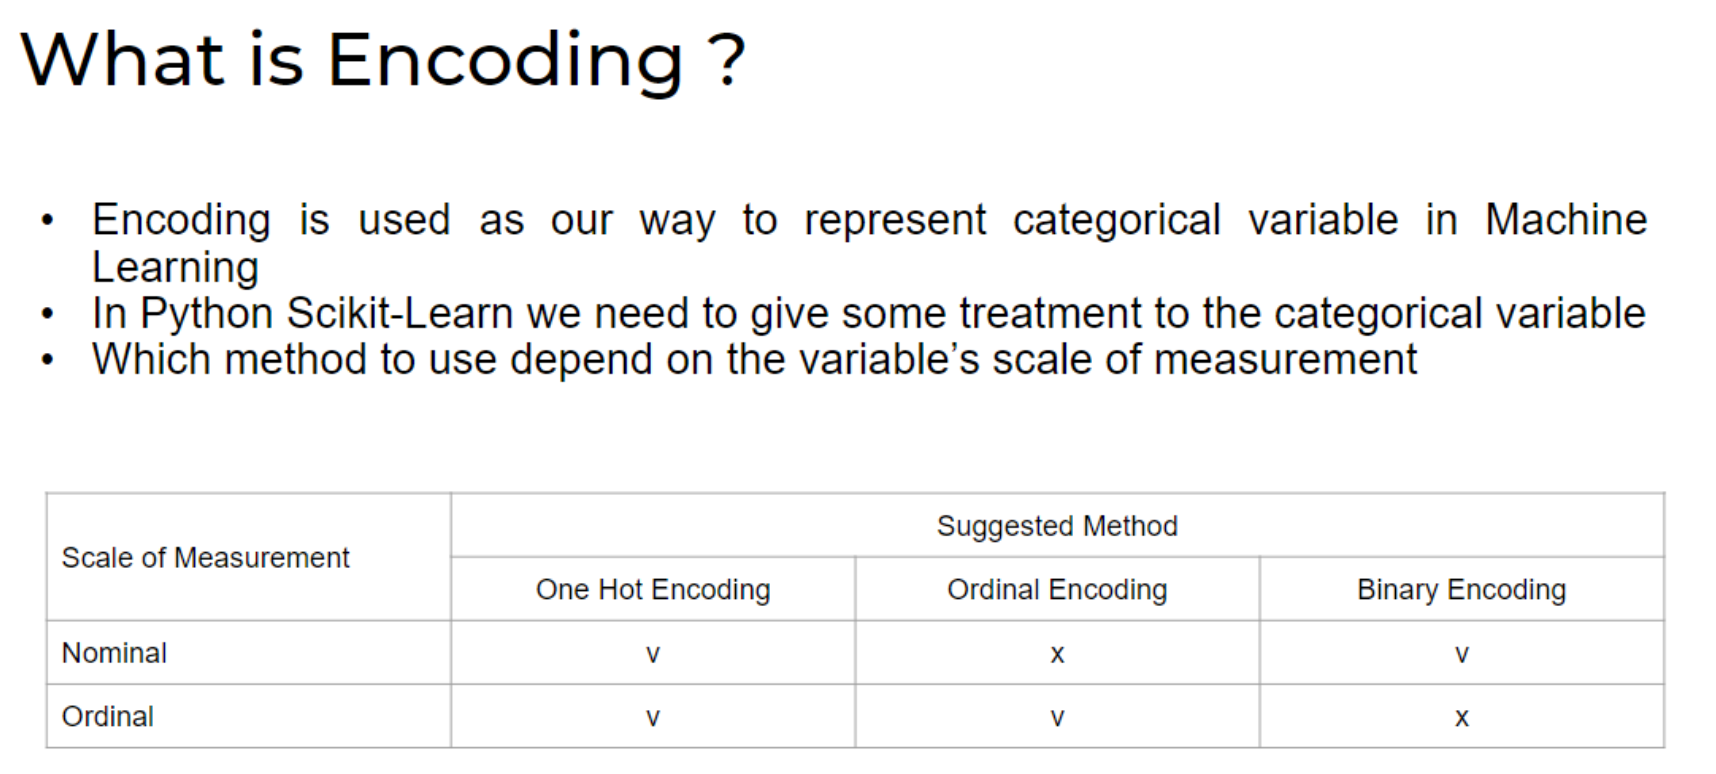

> ## __Pandas: Get Dummy__

In [16]:
#1. Load dataset

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
#Mengeck jumlah data per kategori value setiap variable

for i in 'sex smoker day time'.split():
    print(tips[i].value_counts())

Male      157
Female     87
Name: sex, dtype: int64
No     151
Yes     93
Name: smoker, dtype: int64
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64
Dinner    176
Lunch      68
Name: time, dtype: int64


__NOTES:__
<br> these are the variables that we will transform into dummy variables.
- Sex two categories
- smoker two categories
- day four categories 
- time two categories. 
<br> For each categories we will make one dummy variable.

In [18]:
#membuat dummy dari kolom yg telah ditentukan dan dijadikan dataframe

tips_dummy = pd.get_dummies(tips, columns='sex smoker day time'.split())
tips_dummy.head()

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1


__Result:__
<br>You can clearly see that each variables now has dummy variables as many as the number of category.
(-) Jumlah kolom menjadi banyak sekali

> ## __ScikitLearn: One Hot Encoding__

One Hot Encoding also can be implemented using sklearn library. <br>we use OneHotEncoder and ColumnTransformer classes. <br>OneHotEncoder for the one hot encoding method and ColumnTransformer to select which variable to transform.

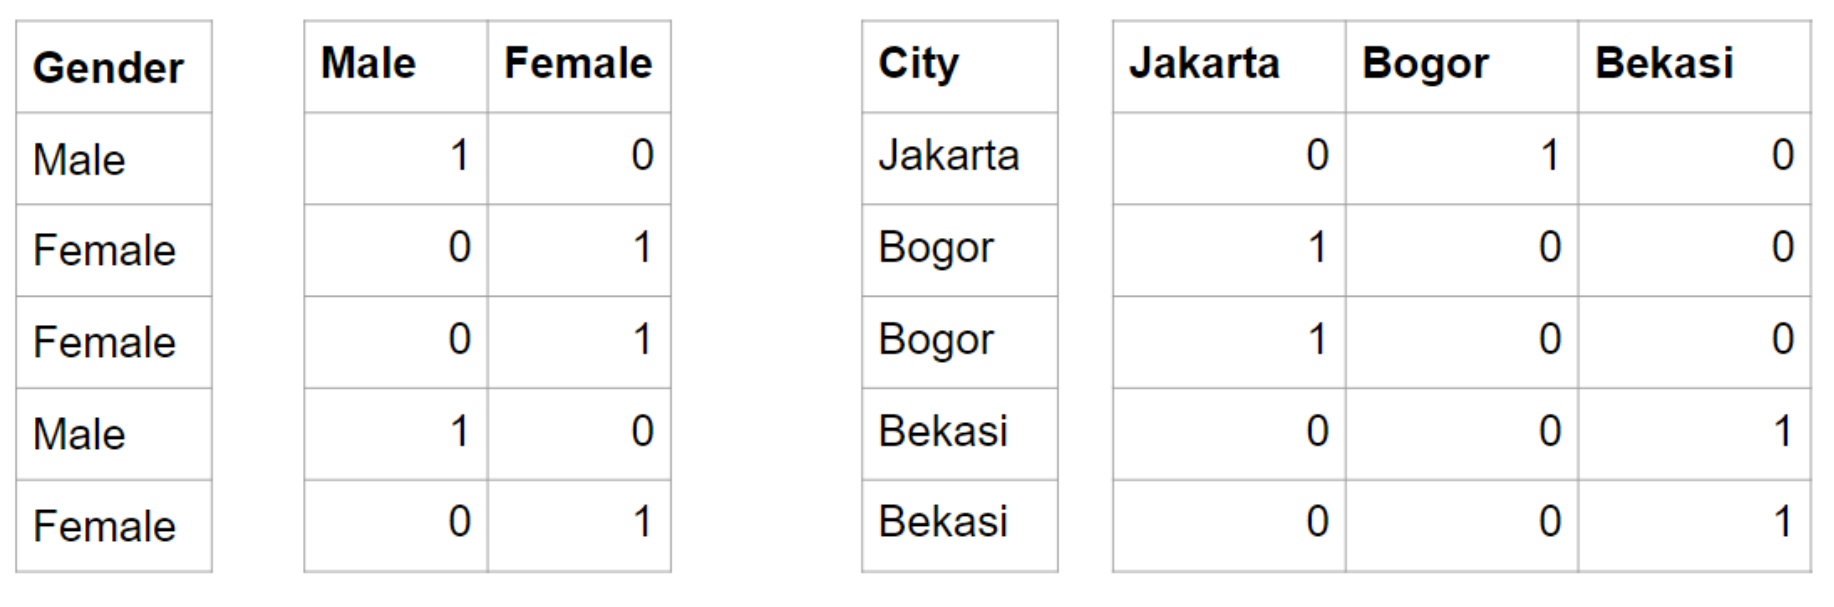

In [19]:
#1. Import Library

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
#Melihat parameter yg ada di onehot

OneHotEncoder().get_params()

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'sparse': True}

In [21]:
#2. Membuat ColumnTransformer(melakukan perubahan pada column) dan encoding

                                #nama proses, functionnya, datanya kolom apa aja
transformer = ColumnTransformer([
                                ('encoder', OneHotEncoder(), 'sex smoker day time'.split())
])
# Jumlah kategori : 2 + 2 + 4 + 2 = 10
#jika ingin melakukan encoding lain untuk kolom lain, ditulis dialam tuple sesuai format diatas

tips_encoded = pd.DataFrame(transformer.fit_transform(tips))
tips_encoded.head()
#minusnya nama columnya berubah jadi angka

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


__Notes:__
Using this method you don't automatically rename the variables. <br> You must get the name of the feature separately. <br>But, in the later course you will find out that preprocessing method from skelarn can make your whole process of the modeling easier for: cross validation and hyperparameter tuning.

In [22]:
#mengecek nama kolom aslinya

transformer.get_feature_names()

['encoder__x0_Female',
 'encoder__x0_Male',
 'encoder__x1_No',
 'encoder__x1_Yes',
 'encoder__x2_Fri',
 'encoder__x2_Sat',
 'encoder__x2_Sun',
 'encoder__x2_Thur',
 'encoder__x3_Dinner',
 'encoder__x3_Lunch']

In [23]:
#mengubah nama kolom dataframe menjadi nama hasil encoding

tips_encoded.columns = transformer.get_feature_names()
tips_encoded = pd.concat([tips['total_bill tip size'.split()], tips_encoded], axis=1)
tips_encoded.head()

,total_bill,tip,size,encoder__x0_Female,encoder__x0_Male,encoder__x1_No,encoder__x1_Yes,encoder__x2_Fri,encoder__x2_Sat,encoder__x2_Sun,encoder__x2_Thur,encoder__x3_Dinner,encoder__x3_Lunch
0,16.99,1.01,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.34,1.66,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,21.01,3.50,3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,23.68,3.31,2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,24.59,3.61,4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


> ## __Manual: Ordinal Encoding (.map)__

We illustrate implementation of Ordinal encoding using .map and category_encoder library. This library can be integrated with scikit learn library and can be used in modeling process aswell.

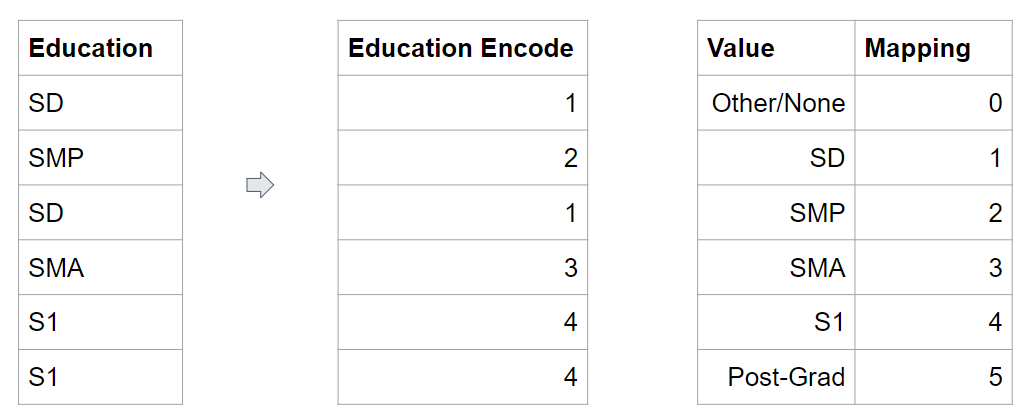

In [24]:
#1. Mempersiapkan data

tips_ordinal_encoded = tips.copy()

In [25]:
#2. Mengecek value counts

tips_ordinal_encoded.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [26]:
#3. Melakukan encoding secara manual dengan .map

tips_ordinal_encoded['day'] = tips_ordinal_encoded['day'].map({'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4})
tips_ordinal_encoded.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4


In [27]:
#4. Mengeck value counts yg sudah berubah

tips_ordinal_encoded.day.value_counts()

3    87
4    76
1    62
2    19
Name: day, dtype: int64

> ## __Category_encoder : OrdinalEncoder (ce)__

In [28]:
#1. Import library

import category_encoders as ce

In [29]:
#2. Membuat list dictionary dan encoding

#membuat list dictionary sesuai encoding yg diinginkan
ordinal_mapping=[
    {'col': 'day',
     'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun':4}}
]

#membuat objek dan encoding
ordinal_encoder = ce.OrdinalEncoder(cols = 'day', mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day'])
dford.head()

,day
0,4
1,4
2,4
3,4
4,4


In [30]:
#3. menggabungkan tabel dengan concat

tips_ordinal_encoded = pd.concat([tips, dford], axis=1)
tips_ordinal_encoded.head()

,total_bill,tip,sex,smoker,day,time,size,day
0,16.99,1.01,Female,No,Sun,Dinner,2,4
1,10.34,1.66,Male,No,Sun,Dinner,3,4
2,21.01,3.50,Male,No,Sun,Dinner,3,4
3,23.68,3.31,Male,No,Sun,Dinner,2,4
4,24.59,3.61,Female,No,Sun,Dinner,4,4


In [31]:
# CONTOH: encoding dua kolom sekaligus

ordinal_mapping=[
    {'col': 'day',
     'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun':4}},
    {'col': 'time',
     'mapping': {None: 0, 'Lunch': 1, 'Dinner': 2}}
]

ordinal_encoder = ce.OrdinalEncoder(cols = 'day time'.split(), mapping = ordinal_mapping)
dford = ordinal_encoder.fit_transform(tips['day time'.split()])
dford.head()

C:\Users\asus\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,day,time
0,4,2
1,4,2
2,4,2
3,4,2
4,4,2


In [32]:
#menggabungkan contoh diatas dengan concat

tips_ordinal_encoded = pd.concat([tips, dford], axis=1)
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size,day,time
0,16.99,1.01,Female,No,Sun,Dinner,2,4,2
1,10.34,1.66,Male,No,Sun,Dinner,3,4,2
2,21.01,3.50,Male,No,Sun,Dinner,3,4,2
3,23.68,3.31,Male,No,Sun,Dinner,2,4,2
4,24.59,3.61,Female,No,Sun,Dinner,4,4,2
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3,2
242,17.82,1.75,Male,No,Sat,Dinner,2,3,2


> ## __Binary Encoding__

<br> Binary encoding using category_encoder library. 
<br> We will implement binary ecoding using the category_encoders library to day variable.

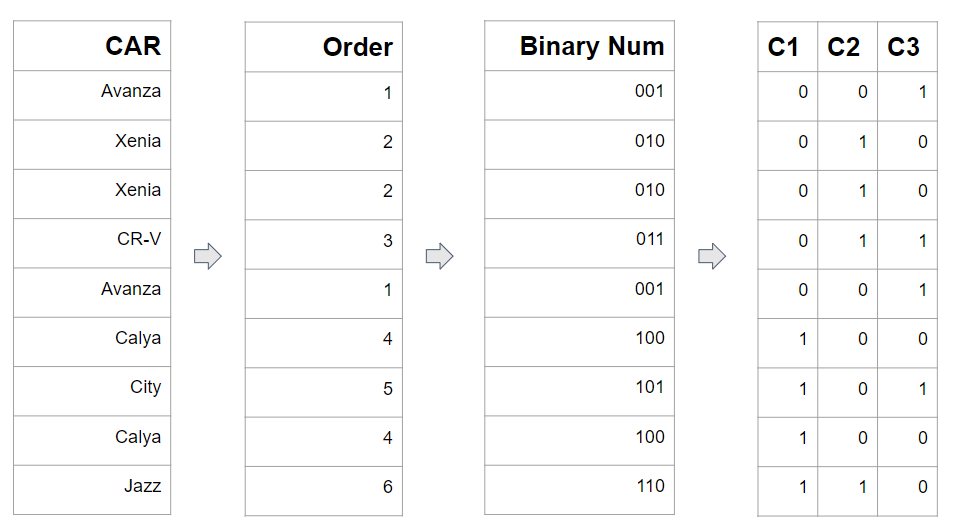

In [33]:
#1.Melakukan encoding

binary_encoder = ce.BinaryEncoder(cols = ['day'])
dfbin = binary_encoder.fit_transform(tips['day'])
dfbin.head()

#hasil encoding muncul 3 kolom untuk binary karena jumlah kategori kolom aslinya ada 4 (thurs, fri, sat, sun)

C:\Users\asus\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [34]:
#2. Menggabungkan df asli dan hasil encoding

tips_binary_encoded = pd.concat([tips, dfbin], axis=1)
tips_binary_encoded.head()

,total_bill,tip,sex,smoker,day,time,size,day_0,day_1,day_2
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1


In [35]:
#mengeck unique

tips_binary_encoded['day'].unique()

#terdapat 4 kategori

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Sun', 'Sat', 'Thur', 'Fri']

In [36]:
#Jika ada data baru dan mau diencode 

day = pd.Series('Fri Sat Sun Thur'.split(), name='day') #data baru 

day_binary = binary_encoder.transform(day) #encoder yg telah dibuat
day_binary

,day_0,day_1,day_2
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,1


In [37]:
#inverse transform untuk mengembalikan kembali ke data sebelum di encode

binary_encoder.inverse_transform(day_binary)

,day
0,Fri
1,Sat
2,Sun
3,Thur


##################################################################################################################################

# __Apply Several Preprocessing Method to Modeling at once Part 1a : Ridge__

__Table of Content__
1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

In [38]:
#Import library

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

> __1. DATA__

In [39]:
#Load dataset

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> __2. PREPROCESSING__

Preprocess scheme:
1. one hot encoding : sex, smoker, time
1. binary encoding : day
1. robust scaler : total_bill
1. no treatment : size

In [40]:
#Melakukan encoding sekaligus

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), 'sex smoker time'.split()),
    ('binary', ce.BinaryEncoder(), ['day']),
    ('robust', RobustScaler(), ['total_bill'])
], remainder = 'passthrough')

> __3. DATA SPLITTING__

__Train : Test = 70 : 30__

In [41]:
#Menentukan variabel dependent dan independent

X = tips.drop('tip', axis=1)
y = tips['tip']

In [42]:
#Melakukan data splitting

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

> __4. DATA TRANSFORM__ 

Here, we will do preprocessing step. Like we discuss previously. we apply .fit only to training set and .transform for both training set and test set.

In [43]:
#melihat isi dari x_train

X_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [44]:
#1. Melakukan proses pada x train dan x test

X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

C:\Users\asus\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [45]:
#2. Membuat hasil proses diatas menjadi df

X_trp_df = pd.DataFrame(X_train_preprocessed)
X_tsp_df = pd.DataFrame(X_test_preprocessed)
X_trp_df.head()

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0


In [46]:
#Untuk melihat apa saja yg menjadi transform

transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('binary', BinaryEncoder(), ['day']),
 ('robust', RobustScaler(), ['total_bill']),
 ('remainder', 'passthrough', [5])]

In [47]:
#Untuk melihat feature di onehotencoder

transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [48]:
#Untuk melihat feature di binary encoder

transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [49]:
#3. Mengubah nama kolom untuk hasil encoding

features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill scaled', 'size']

X_trp_df.columns = features
X_tsp_df.columns = features
X_trp_df.head()

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,1.0,1.0,0.0,0.0,0.0,1.0,-0.566396,2.0
1,1.0,0.0,0.0,0.0,1.0,0.0,-0.647696,3.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.316170,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.245709,2.0
4,1.0,1.0,0.0,0.0,1.0,0.0,2.081301,2.0


In [50]:
X_tsp_df.head()

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill scaled,size
0,0.0,0.0,0.0,0.0,1.0,0.0,-0.117435,3.0
1,1.0,1.0,0.0,0.0,0.0,1.0,0.251129,2.0
2,1.0,1.0,0.0,0.0,0.0,1.0,-0.334237,2.0
3,1.0,1.0,0.0,0.0,0.0,1.0,0.070461,4.0
4,1.0,1.0,0.0,0.0,0.0,1.0,-0.225836,2.0


> __5. MODEL FITTING & EVALUATION__

In [51]:
#1. Melakukan fitting model ridge

ridge = Ridge()
ridge.fit(X_trp_df, y_train) #fitting dgn x hasil transform

Ridge()

In [52]:
#2. Melakukan prediksi

y_pred = ridge.predict(X_tsp_df)
#kalo predict, nanti masukin formatnya sesuai x_tsp_df

In [53]:
#3. Model performance (mse, rmse) #disini tidak melihat over_under_fitting

print('mse', mean_squared_error(y_test, y_pred))
print('rmse', np.sqrt(mean_squared_error(y_test, y_pred)))

mse 1.0577456219830774
rmse 1.0284676086212328


> __6. MODEL PROPERTIES*__

In [54]:
#mengecek model properties berupa coef (optional)

coef_table = pd.DataFrame({'feature': X_trp_df.columns, 'coef': ridge.coef_})
coef_table

,feature,coef
0,x0_Male,-0.219943
1,x1_Yes,-0.071079
2,x2_Lunch,0.116938
3,day_0,0.031693
4,day_1,-0.002460
5,day_2,-0.061386
6,total_bill scaled,1.086144
7,size,0.172890


############################################################################

# __Apply Several Preprocessing Method to Modeling at once Part 1b : Tree__

__Table of Content__


1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

In [55]:
#Import Library

from sklearn.tree import DecisionTreeRegressor, plot_tree

> __1. DATA__

In [56]:
#Load dataset

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


preprocess v2:
1. one hot encoding : sex, smoker
1. ordinal encoding : time, day
1. no treatment : size, total_bill

> __2. PREPROCESSING__

preprocess v1 scheme:
1. one hot encoding : sex, smoker, time
1. ordinal encoding : day
1. no treatment : size, total_bill

In [57]:
#1. Membuat ordinal mapping dan encoding

#a. membuat ordinal mapping terlebih dahulu
ordinal_mapping = [
    {'col': 'day',
    'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}},
]
#kalo nambah kolom bisa, jadi lgsg bikin beberapa

#b. membuat objek dan encoding
ordinal_encoder = ce.OrdinalEncoder(cols='day', mapping=ordinal_mapping)

In [58]:
#2. Membuat transformer encoding keseluruhan

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
    ('ordinal', ordinal_encoder, ['day']),
], remainder = 'passthrough')

#passthrough = kolom yg tidak dituliskan, akan dilewatkan ( defaultnya drop)

> __3. DATA SPLITTING__

In [59]:
#1. Menentukan variabel dependen dan independen

X = tips.drop('tip', axis=1)
y = tips['tip']


In [60]:
#2. Melakukan data splitting

Xtr, Xts, ytr, yts = train_test_split(X, y, random_state=10)

> __4. DATA TRANSFORM__

In [61]:
#Mengecek data xtrain

Xtr.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [62]:
#1. Melakukan data transform hasil encoding

Xtr_p = transformer.fit_transform(Xtr)
Xts_p = transformer.transform(Xts)

In [63]:
#2. Mengubah array 2D menjadi Dataframe

Xtr_p = pd.DataFrame(Xtr_p)
Xts_p = pd.DataFrame(Xts_p)

In [64]:
#Untuk mengecek list method yg telah dibuat

transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('ordinal',
  OrdinalEncoder(cols=['day'],
                 mapping=[{'col': 'day',
                           'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                       'Thur': 1}}]),
  ['day']),
 ('remainder', 'passthrough', [0, 5])]

In [65]:
Xtr.columns

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [66]:
#Mengecek feature name di method (0) 

transformer.transformers_[0]

('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time'])

In [67]:
#Mengecek isi dari feature name di method (0) 

transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [68]:
#Mengecek isi dari feature name di method (1) 

transformer.transformers_[1][1].get_feature_names()

['day']

In [69]:
#3. Membuat feature baru setelah di model

new_features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill', 'size']
new_features

['x0_Male', 'x1_Yes', 'x2_Lunch', 'day', 'total_bill', 'size']

In [70]:
#Feature awal sebelum dimodelling

features = X.columns
features

Index(['total_bill', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [71]:
#4. Dijadikan menjadi dataframe

Xtr_p.columns = new_features
Xts_p.columns = new_features

display(Xtr_p.head())
display(Xts_p.head())

,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,1.0,1.0,0.0,3.0,11.24,2.0
1,1.0,0.0,0.0,4.0,10.34,3.0
2,1.0,0.0,0.0,4.0,21.01,3.0
3,1.0,0.0,0.0,3.0,20.23,2.0
4,1.0,1.0,0.0,4.0,40.55,2.0


,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,0.0,0.0,0.0,4.0,16.21,3.0
1,1.0,1.0,0.0,3.0,20.29,2.0
2,1.0,1.0,0.0,3.0,13.81,2.0
3,1.0,1.0,0.0,3.0,18.29,4.0
4,1.0,1.0,0.0,3.0,15.01,2.0


> __5. MODEL FITTING & EVALUATION__

In [72]:
#1. Melakukan model fitting

dtr = DecisionTreeRegressor(max_depth=3)
dtr.fit(Xtr_p, ytr)

DecisionTreeRegressor(max_depth=3)

In [73]:
#2. Melakukan prediksi

y_pred = dtr.predict(Xts_p)

In [74]:
#3. Melakukan model performance dgn mse dan rmse

print('mse:', mean_squared_error(yts, y_pred))
print('rmse:', np.sqrt(mean_squared_error(yts, y_pred)))

mse: 0.8414314225960589
rmse: 0.9172957116415943


> __6. MODEL PROPERTIES__

In [75]:
#1. Membuat importance tabel untuk dtc

importance_table = pd.DataFrame({
    'importance': dtr.feature_importances_
}, index=new_features)

importance_table

,importance
x0_Male,0.000000
x1_Yes,0.108978
x2_Lunch,0.000000
day,0.000000
total_bill,0.888692
size,0.002329


<AxesSubplot:>

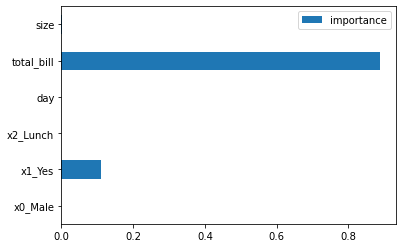

In [76]:
#2. Membuat plot dari hasil importance diatas

importance_table.plot(kind='barh')

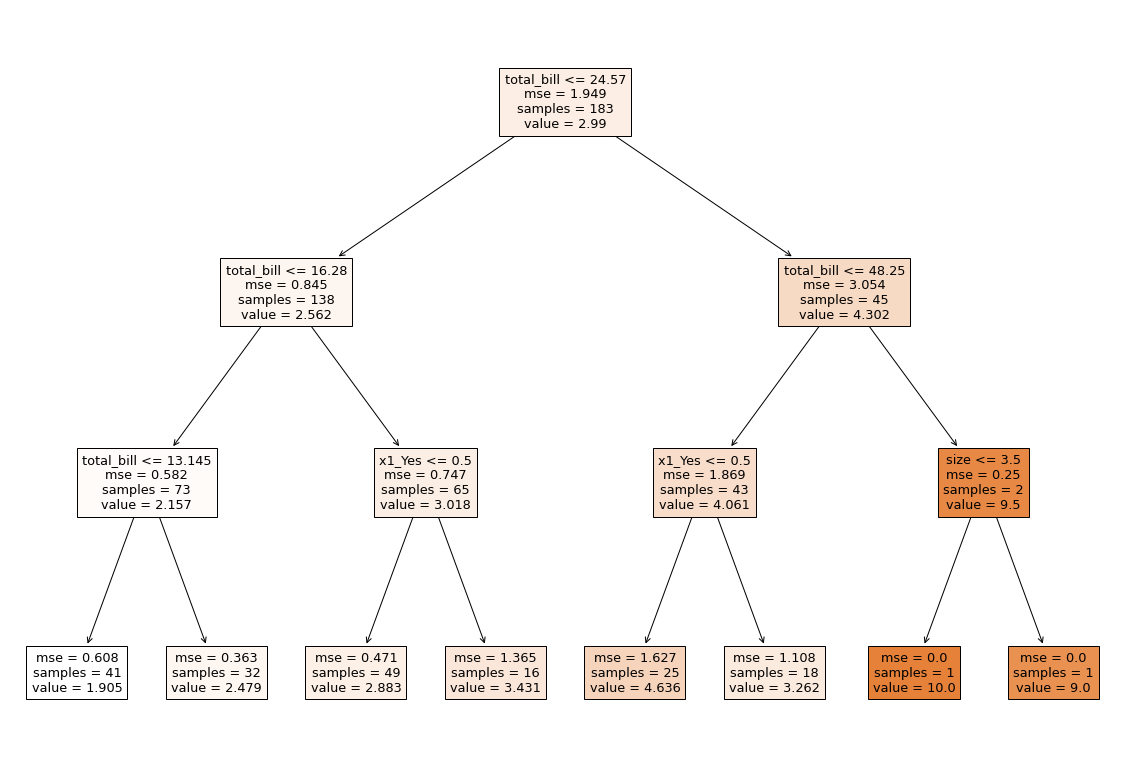

In [77]:
#3. Membuat plot tree

plt.figure(figsize=(20,14))
plot_tree(dtr, feature_names = new_features, filled=True)
plt.show()

Notes:
- value : rata2 dari sample
- jumlah sample di root == jumlah sample di kedua foot

# __OUTLIER__

This time, we will illustrate about outlier (global outlier, contextual outlier and collective outlier) and its effect in the modeling especially linear regression.

In [78]:
#Membuat data sederhana tanpa outlier

x = list(np.random.uniform(155,165,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

<ipython-input-78-908edf62199e>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [79]:
#Dijadikan dataframe

df_association = pd.DataFrame({
    'x': x,
    'y': y,
    'y_real': y_real
})

df_association.head()

,x,y,y_real
0,163.69,59.68,59.29
1,160.09,59.86,58.03
2,163.54,58.97,59.24
3,163.12,58.49,59.09
4,161.87,59.42,58.65


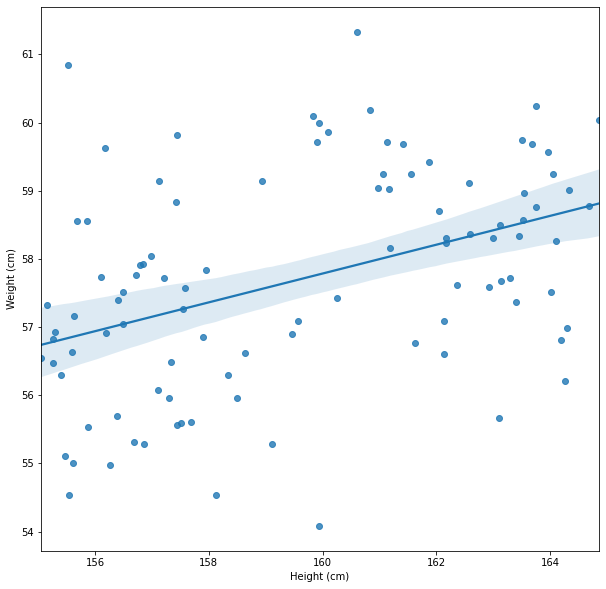

In [80]:
#Membuat plot dari data sederhana yg telah dibuat

plt.figure(figsize=(10,10))
sns.regplot(x='x', y='y', data=df_association)
# sns.lineplot(x='x', y='y_real', data=df_association)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (cm)')

plt.show()

Scatter Plot of two variable without outlier

> ## __1. Global Outlier__

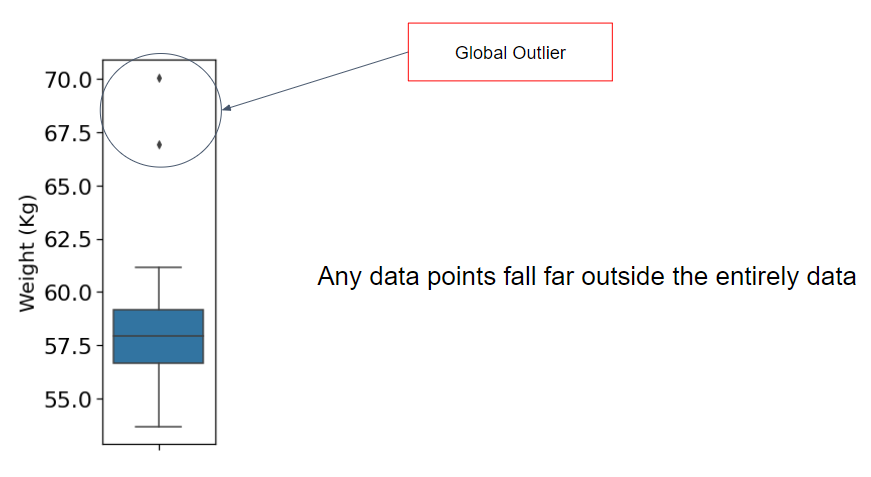

- Bisa dihitung dengan menggunakan IQR

In [81]:
#Membuat data sederhana tanpa outlier

x = [191,190]
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_outlier = df_association.append(df_add)
df_association_outlier.head()

<ipython-input-81-a69fd66fcd24>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


,x,y,y_real
0,163.69,59.68,59.29
1,160.09,59.86,58.03
2,163.54,58.97,59.24
3,163.12,58.49,59.09
4,161.87,59.42,58.65


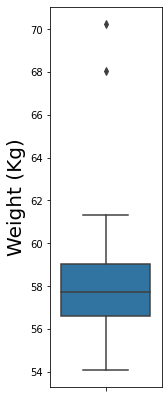

In [82]:
#Membuat boxplot dengan data yg ada oulier (weight)

plt.figure(figsize=(2,7))
sns.boxplot(y = df_association_outlier['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

plt.show()

#terlihat ada outlier (dilihatnya secara global aja)

Global outlier for height

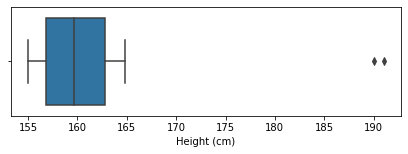

In [83]:
#Membuat boxplot dengan data yg ada oulier (height)

plt.figure(figsize=(7,2))
sns.boxplot(x=df_association_outlier['x'])
plt.xlabel('Height (cm)')

plt.show()
#terlihat ada outlier secara global

> ## __2. Contextual Outlier__

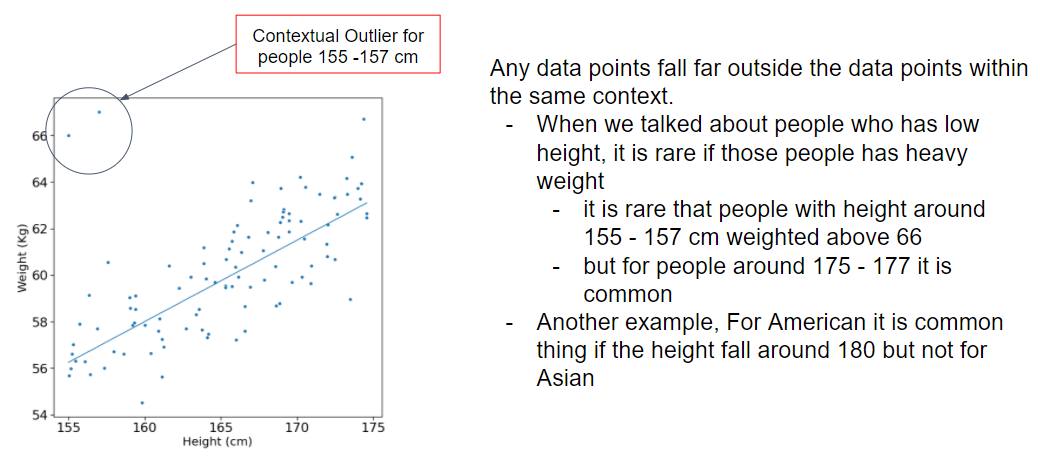

In [84]:
#Membuat data sederhana

x = list(np.random.uniform(155,175,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_association = pd.DataFrame({'x': x, 'y': y, 'y_real': y_real})

<ipython-input-84-60d58cb6bcd1>:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]


In [85]:
#Membuat data sederhana (lanjutan)

x = [155,157]

y = [66,67]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_contextual = df_association.append(df_add)
df_association_contextual.head()

,x,y,y_real
0,166.65,59.29,60.33
1,161.17,59.27,58.41
2,163.95,60.41,59.38
3,171.86,59.36,62.15
4,162.31,57.94,58.81


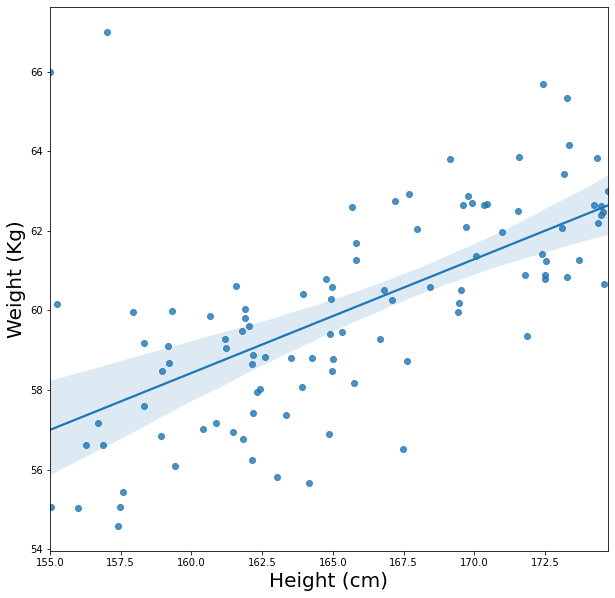

In [86]:
#Membuat plot dari data sederhana yg dibuat

plt.figure(figsize=(10,10))
sns.regplot(x='x', y='y', data=df_association_contextual)
# sns.lineplot(x='x', y='y_real', data=df_association_contextual)
plt.xlabel('Height (cm)', fontsize=20)
plt.ylabel('Weight (Kg)', fontsize=20)

plt.show()

> ## __Outlier in LR: Influential Observation (Break the pattern)__

In [87]:
#Membuat data sederhana

x = [170, 171, 173, 180]

y = [91, 95, 95, 100]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_association_influenced = df_association.append(df_add)
df_association_influenced.head()

,x,y,y_real
0,166.65,59.29,60.33
1,161.17,59.27,58.41
2,163.95,60.41,59.38
3,171.86,59.36,62.15
4,162.31,57.94,58.81


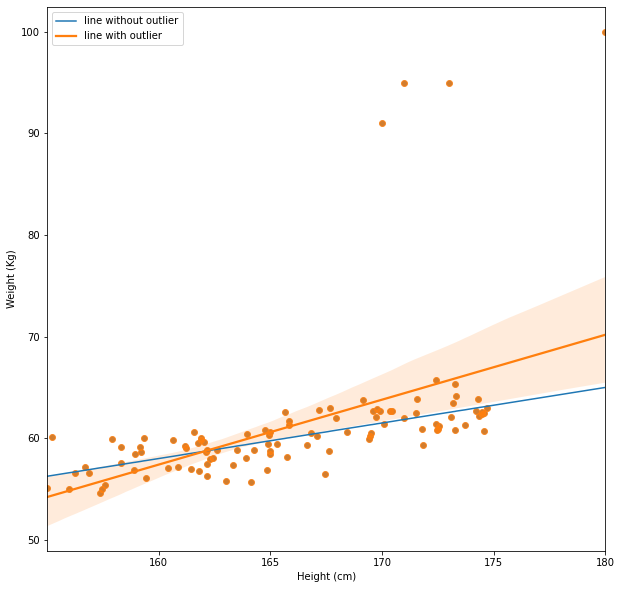

In [88]:
#Membuat plot dengan data sederhana

plt.figure(figsize=(10,10))
sns.scatterplot(x='x', y='y', data=df_association_influenced)
sns.lineplot(x='x', y='y_real', data=df_association_influenced)
sns.regplot(x='x', y='y', data = df_association_influenced)
plt.legend(['line without outlier', 'line with outlier'], loc = 'upper left')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (Kg)')
plt.show()

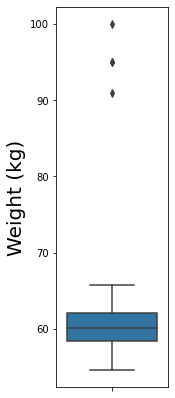

In [89]:
#Membuat boxplot

plt.figure(figsize=(2,7))
sns.boxplot(y = df_association_influenced['y'])
plt.ylabel('Weight (kg)', fontsize = 20)

plt.show()

###############################################################################

# __BINNING__

There is some many kind of relationship exists. Binning can help us capture any type of relationship in the modeling. We will give an illustration about example of binning method and performance improvement using binning.

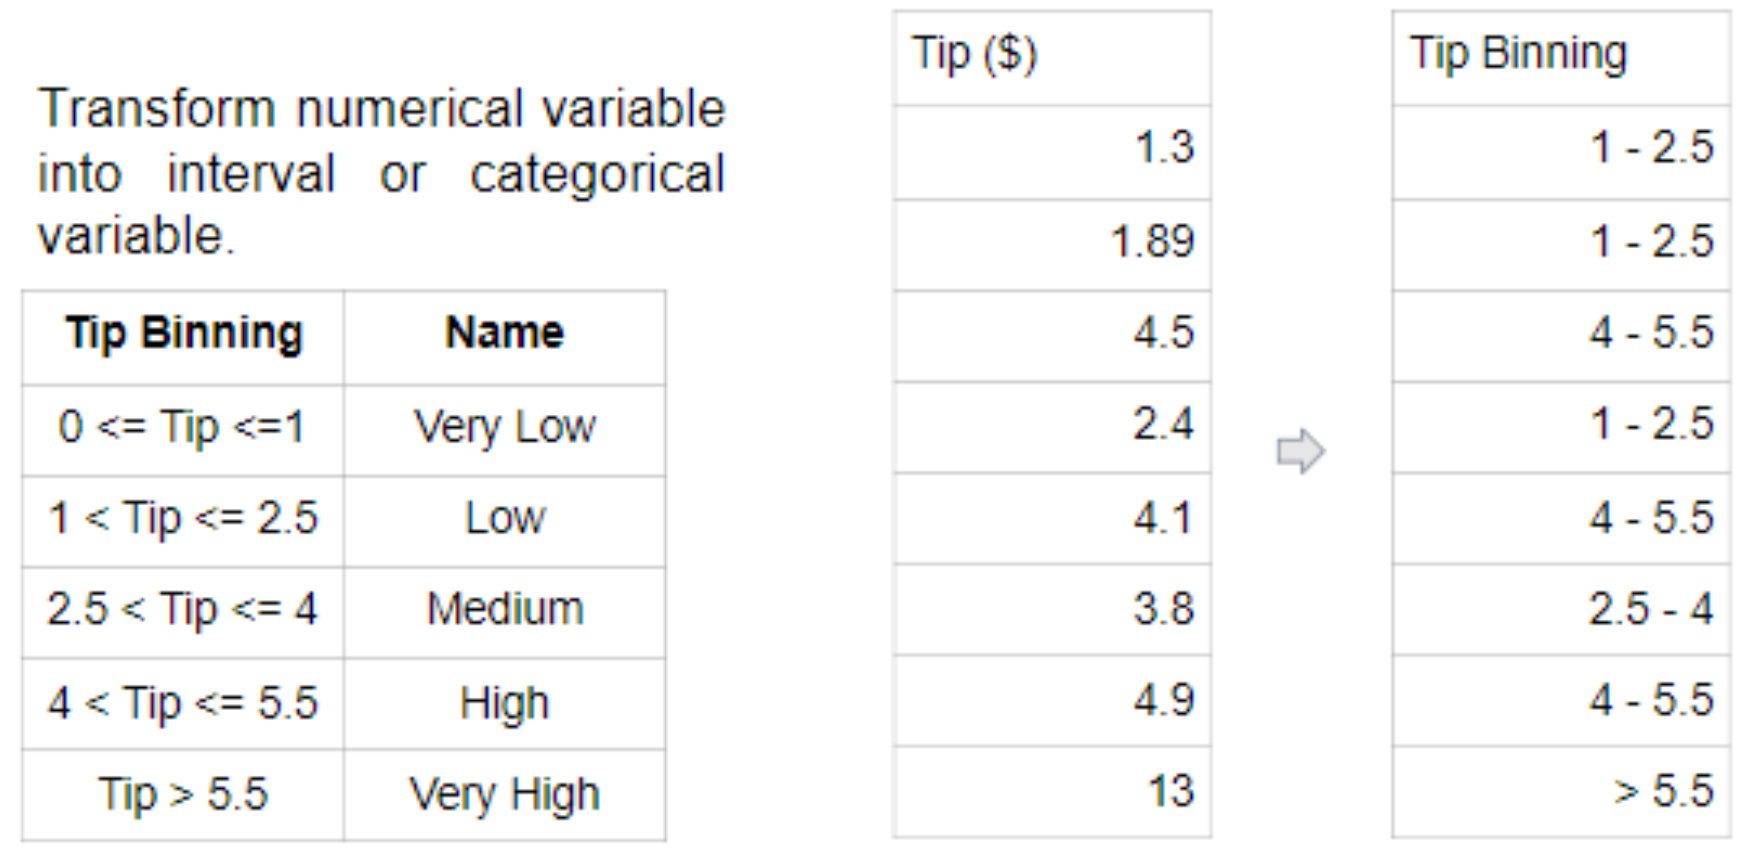

In [90]:
#Load dataset

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


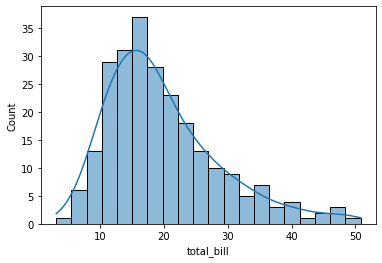

In [91]:
#Memvisualisasikan dengan plot

sns.histplot(tips['total_bill'], bins=20, kde=True)
plt.show()

In [92]:
#1. Membuat dataset baru dan melakukan binning

tips2 = tips.copy()
# tips2['total_bill total_bill_eqfreq total_bill_eqintv total_bill_eqfreq_encoded total_bill_eqintv_encoded'.split()]

tips2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> ## __1. Equal Frequencies__

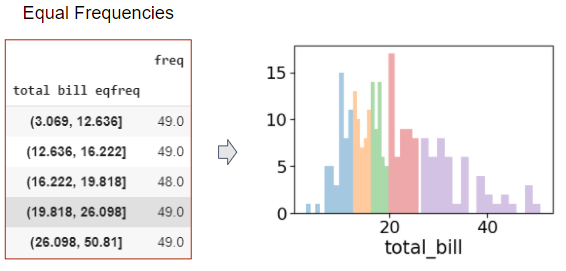

In [93]:
#1.Melakukan binning equal frequensi secara manual

tips2['total_bill_eqfreq'] = pd.qcut(tips2['total_bill'], 5) #binning equal freq
tips2['total_bill_eqfreq_encoded'] = pd.qcut(tips2['total_bill'], 5, labels = range(1,6)) #melabel binning equal freq

tips2.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_eqfreq,total_bill_eqfreq_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4


In [94]:
#Membuat picot tabel

eqfreq = tips2.pivot_table(
    index ='total_bill_eqfreq',
    aggfunc = len,
    values = 'tip'
)
eqfreq.columns = ['freq']

eqfreq

,freq
total_bill_eqfreq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


__Terlihat jumlah freq sama__

> ## __2. Equal Interval__

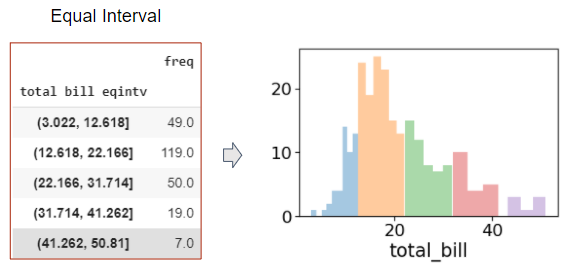

In [95]:
#1.Melakukan binning equal interval secara manual

tips2['total_bill_eqintv'] = pd.cut(tips2['total_bill'], 5) #binning equal intv
tips2['total_bill_eqintv_encoded'] = pd.cut(tips2['total_bill'], 5, labels = range(1,6)) #melabel binning equal intv

tips2.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_eqfreq,total_bill_eqfreq_encoded,total_bill_eqintv,total_bill_eqintv_encoded
0,16.99,1.01,Female,No,Sun,Dinner,2,"(16.222, 19.818]",3,"(12.618, 22.166]",2
1,10.34,1.66,Male,No,Sun,Dinner,3,"(3.069, 12.636]",1,"(3.022, 12.618]",1
2,21.01,3.50,Male,No,Sun,Dinner,3,"(19.818, 26.098]",4,"(12.618, 22.166]",2
3,23.68,3.31,Male,No,Sun,Dinner,2,"(19.818, 26.098]",4,"(22.166, 31.714]",3
4,24.59,3.61,Female,No,Sun,Dinner,4,"(19.818, 26.098]",4,"(22.166, 31.714]",3


In [96]:
#Membuat picot tabel

eqintv = tips2.pivot_table(
    index = 'total_bill_eqintv',
    aggfunc = len,
    values = 'tip'
)
eqintv.columns = ['freq']

eqintv

,freq
total_bill_eqintv,
"(3.022, 12.618]",49.0
"(12.618, 22.166]",119.0
"(22.166, 31.714]",50.0
"(31.714, 41.262]",19.0
"(41.262, 50.81]",7.0


__Tidak memiliki frekuensi yg sama, namun intervalnya sama__

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


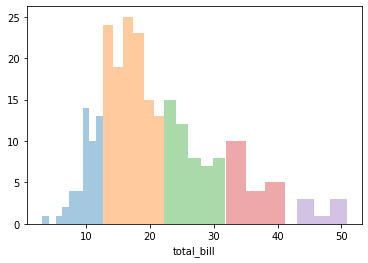

In [97]:
#Memvisualisasikan semua kelas dalam plot

for i in range(1,6):
    sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == i]['total_bill'], kde=False)

<AxesSubplot:xlabel='total_bill'>

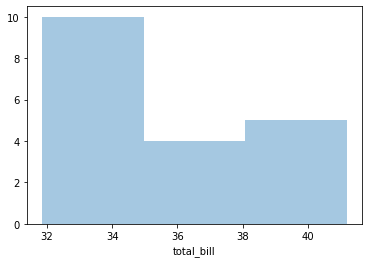

In [98]:
# Menampilkan visualisasi plot kelas ke-4

sns.distplot(tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill'], kde = False)

In [99]:
# Menampilkan data kelas ke-4 pada interval 31.6 - 35

tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill_eqintv total_bill total_bill_eqintv_encoded'.split()][tips2['total_bill'].between(31.6, 35)]

<ipython-input-99-4c3d3621ef07>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tips2[tips2['total_bill_eqintv_encoded'] == 4]['total_bill_eqintv total_bill total_bill_eqintv_encoded'.split()][tips2['total_bill'].between(31.6, 35)]


,total_bill_eqintv,total_bill,total_bill_eqintv_encoded
47,"(31.714, 41.262]",32.40,4
52,"(31.714, 41.262]",34.81,4
83,"(31.714, 41.262]",32.68,4
85,"(31.714, 41.262]",34.83,4
141,"(31.714, 41.262]",34.30,4
173,"(31.714, 41.262]",31.85,4
175,"(31.714, 41.262]",32.90,4
179,"(31.714, 41.262]",34.63,4
180,"(31.714, 41.262]",34.65,4
237,"(31.714, 41.262]",32.83,4


## __Binning Effect on Modeling__

Now, we want to illustrate how binning can improve model performance. First, we want to do some data exploreation and then go ahead into the modeling process.

In [100]:
from sklearn.preprocessing import KBinsDiscretizer

disk = pd.read_csv('disk.csv')
disk.head()

,x,class
0,51,0
1,19,1
2,66,1
3,35,0
4,64,1


In [101]:
#Menghitung value counts pada kolom class

disk['class'].value_counts(normalize=True)
#Terlihat rasionya hampir sama

1    0.51864
0    0.48136
Name: class, dtype: float64

In [102]:
#Melihat analisis descriptive

disk.describe()

,x,class
count,1529.000000,1529.000000
mean,42.809026,0.518640
std,14.299211,0.499816
min,18.000000,0.000000
25%,31.000000,0.000000
50%,44.000000,1.000000
75%,55.000000,1.000000
max,67.000000,1.000000


In [103]:
#1. Melakukan binning secara manual

disk['x_eqintv'] = pd.cut(disk['x'], 7) #binning equal intv
disk['x_eqintv_encoded'] = pd.cut(disk['x'], 7, labels = range(1,8)) #melabel binning equal intv

disk.head()

,x,class,x_eqintv,x_eqintv_encoded
0,51,0,"(46.0, 53.0]",5
1,19,1,"(17.951, 25.0]",1
2,66,1,"(60.0, 67.0]",7
3,35,0,"(32.0, 39.0]",3
4,64,1,"(60.0, 67.0]",7


In [104]:
len(disk) #banyaknya data / sample

1529

In [105]:
#melihat proporsi dataset dalam bentuk rasio per index

pd.crosstab(disk['x_eqintv'], disk['class'], normalize=0) #normalize per index

class,0,1
x_eqintv,,
"(17.951, 25.0]",0.224670,0.775330
"(25.0, 32.0]",0.537037,0.462963
"(32.0, 39.0]",0.835616,0.164384
"(39.0, 46.0]",0.846561,0.153439
"(46.0, 53.0]",0.583673,0.416327
"(53.0, 60.0]",0.302632,0.697368
"(60.0, 67.0]",0.068293,0.931707


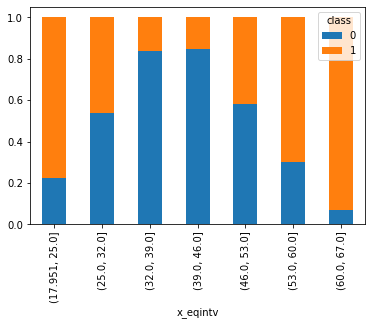

In [106]:
#Memvisualisasikan untuk melihat data linear atau tidak

pd.crosstab(disk['x_eqintv'], disk['class'], normalize=0).plot(kind = 'bar', stacked=True)
plt.show()

from illustration above, you can see that the x variabel alraedy binned into seven categories and you can see the class proportion aswell. The propotion of the '1' class keep decreasing until the fourth class and after that the proportion increase instead. This show __a non linear relationship between x and the probability of the '1' class. Adding polynomial feature surely can improve the performance but we will try binning instead.__

> ### __MODEL 1 : Logistic Regression without binning__

In [107]:
#1. Menentukan data variabel dependen dan independen

X = disk[['x']]
y = disk['class']

In [108]:
#2. Melakukan data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)

In [109]:
#3. Melakukan model fitting

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [110]:
#4. Melakukan prediksi

y_pred = logreg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,

In [111]:
#5. Melihat model performance

print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.5822454308093995


This is the modeling when we dont use binning. we dont give any treatment to the feature. The model accuracy is 58.22%.

> ### __MODEL 2 : Logistic Regression with Binning__

In [112]:
#1. Melakukan binning secara otomatis

discretize = KBinsDiscretizer(n_bins=7, encode='onehot', strategy='uniform') # uniform = eqintv ; quantile = eqfreq
discretize.fit(X_train)

X_train_disc = discretize.transform(X_train)
X_test_disc = discretize.transform(X_test)

In [113]:
print(X_train_disc[:5])

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 5)	1.0
  (3, 3)	1.0
  (4, 6)	1.0


In [114]:
#2. Melakukan model fitting

logreg = LogisticRegression()
logreg.fit(X_train_disc, y_train)

LogisticRegression()

In [115]:
#3. Melakukan prediksi

y_pred = logreg.predict(X_test_disc)

In [116]:
#4. Melihat model performance

print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.6997389033942559


__After we apply binning, the accuracy significantly improve from 58.22% to 69.97%. Binning surely can be used to improve model performance.__

####################################################################

# __MISSING VALUE__

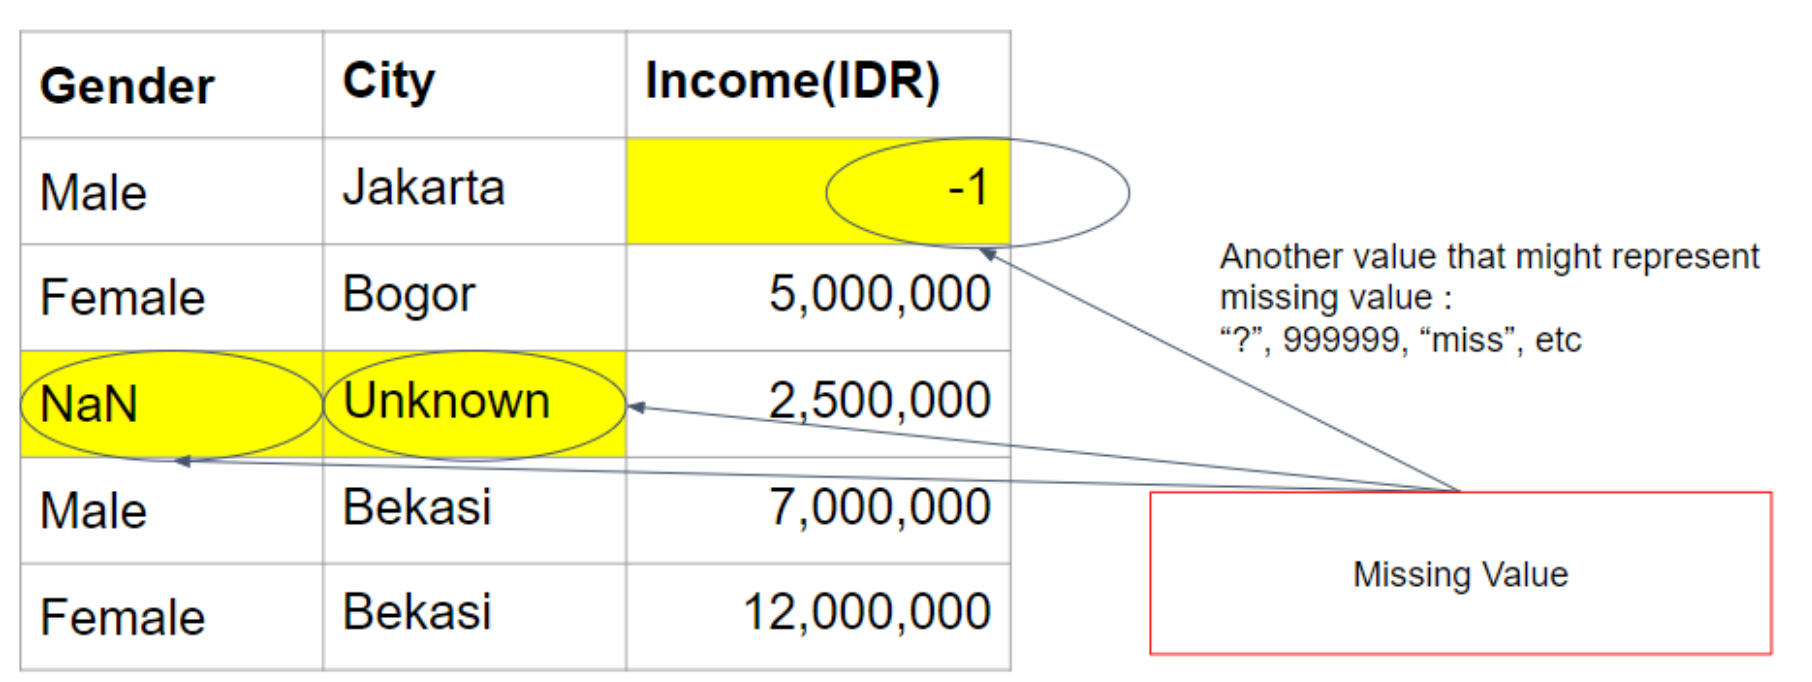

In [117]:
#Membuat data dummy

df = pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan],
    'x7':[3,5,4,5,'-',5]
    })
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10,A,X,M,3
1,5.0,5.0,11,A,Y,M,5
2,NaN,6.0,12,C,X,NaN,4
3,6.0,5.0,9,C,X,M,5
4,7.0,NaN,8,D,NaN,N,-
5,9.0,5.0,11,NaN,Y,NaN,5


In [118]:
#Mengecek info dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      5 non-null      float64
 1   x2      5 non-null      float64
 2   x3      6 non-null      int64  
 3   x4      5 non-null      object 
 4   x5      5 non-null      object 
 5   x6      4 non-null      object 
 6   x7      6 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 464.0+ bytes


In [119]:
#Mengecek value

df['x7'].value_counts()

5    3
4    1
3    1
-    1
Name: x7, dtype: int64

> ## __SIMPLE IMPUTER__

In [120]:
from sklearn.impute import SimpleImputer

> ##### __1. Simple Imputer : Mean__

In [121]:
#Impute numerikal dengan mean

imp_num = SimpleImputer(strategy = 'mean')
df[['x1', 'x2', 'x3']] = imp_num.fit_transform(df[['x1', 'x2', 'x3']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,NaN,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,NaN,N,-
5,9.0,5.0,11.0,NaN,Y,NaN,5


> ##### __2. Simple Imputer : Mode__

In [122]:
#Impute kategorikal dengan modus

imp_mode = SimpleImputer(strategy='most_frequent')
df[['x4', 'x5']] = imp_mode.fit_transform(df[['x4', 'x5']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,NaN,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,X,N,-
5,9.0,5.0,11.0,A,Y,NaN,5


> ##### __3. Simple Imputer : Constant__

In [123]:
#Impute kategorikal dengan constant value

imp_const = SimpleImputer(strategy='constant', fill_value='P')
df[['x6']] = imp_const.fit_transform(df[['x6']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3
1,5.0,5.0,11.0,A,Y,M,5
2,6.2,6.0,12.0,C,X,P,4
3,6.0,5.0,9.0,C,X,M,5
4,7.0,4.8,8.0,D,X,N,-
5,9.0,5.0,11.0,A,Y,P,5


In [124]:
#Impute kategorikal dengan constant value (dijadikan nan), dimana missing value ditentukan

imp_const = SimpleImputer(missing_values='-', strategy='constant', fill_value=np.nan)
df[['x7']] = imp_const.fit_transform(df[['x7']])
df

,x1,x2,x3,x4,x5,x6,x7
0,4.0,3.0,10.0,A,X,M,3.0
1,5.0,5.0,11.0,A,Y,M,5.0
2,6.2,6.0,12.0,C,X,P,4.0
3,6.0,5.0,9.0,C,X,M,5.0
4,7.0,4.8,8.0,D,X,N,NaN
5,9.0,5.0,11.0,A,Y,P,5.0


In [125]:
#Mengecek data info lagi untuk memasikan hasil imputer

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6 non-null      float64
 1   x2      6 non-null      float64
 2   x3      6 non-null      float64
 3   x4      6 non-null      object 
 4   x5      6 non-null      object 
 5   x6      6 non-null      object 
 6   x7      5 non-null      float64
dtypes: float64(4), object(3)
memory usage: 464.0+ bytes


> ## __ITERATIVE IMPUTER__

interative imputer works for numerical only. You can fill the missing value simultaneusly.

In [126]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [127]:
#Menyiapkan dataset

df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [128]:
#1. Melakukan impute numerikal sekaligus untuk dataframe

imp_iter = IterativeImputer(max_iter=10, random_state=0) #max_iter = jumlah maksimal itterative
df[['x1', 'x2', 'x3']] = imp_iter.fit_transform(df[['x1', 'x2', 'x3']])

df

,x1,x2,x3,x4
0,4.30000,2.900000,9.000000,A
1,5.10000,5.100000,11.100000,A
2,7.18363,6.300000,9.823389,C
3,6.30000,4.900000,8.900000,C
4,7.40000,5.073866,9.100000,D
5,9.10000,5.400000,11.000000,D


> ##  __NEAREST NEIGHBOUR IMPUTER__

Nearest neighbour imputer also work for numerical only. You can also fill the missing value simultaneusly.

In [129]:
from sklearn.impute import KNNImputer

In [130]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [131]:
#Impute numerikal dengan 

imp_knn = KNNImputer(n_neighbors=2, weights='uniform') #uniform == semuanya dianggap setara
df[['x1', 'x2', 'x3']] = imp_knn.fit_transform(df[['x1', 'x2', 'x3']])

df

,x1,x2,x3,x4
0,4.3,2.90,9.00,A
1,5.1,5.10,11.10,A
2,7.1,6.30,11.05,C
3,6.3,4.90,8.90,C
4,7.4,5.15,9.10,D
5,9.1,5.40,11.00,D


###################################################################

# __Generate New Features : Polynomial__

Relationship between variables often appear to be unlinear. Thus, when you still wanna use linear model (logistic regression and linear regression) you can add polynomial features.

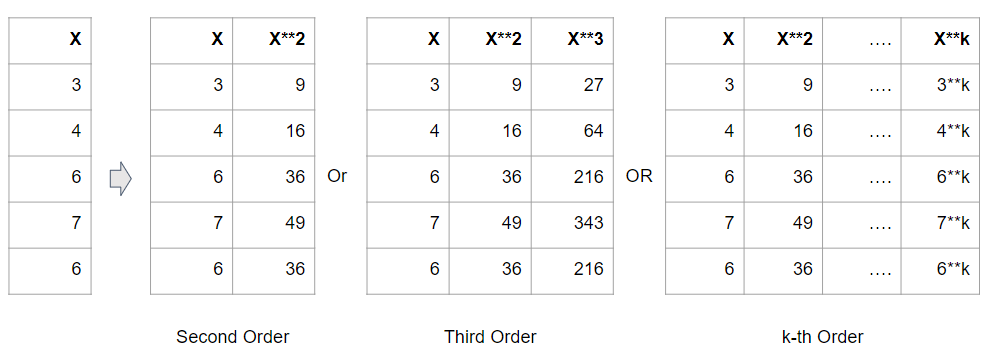

In [132]:
#Import library

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In the illustration below, you can see how is the effect of the polynomial feature. We will do modeling twice. First, without polynomial features. Second, with polynomial features. The target variabel is
1. (+) a good quality wine : quality > 6
1. (-) a bad quality wine : quality <= 6

<br>
Features: alcohol and density

In [133]:
#Input dataset

wine = pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [134]:
#Mengecek jumlah data yg kosong tiap kolomnya

wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [135]:
#Mengisi data yg kosong di kolom alkohol
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)

#Membuat kolom baru dengan mengkategorikan wine quality menjadi 2 kualitas wine
wine['label'] = np.where(wine['quality']>6,1,0)
wine['label'].value_counts()

0    422
1     98
Name: label, dtype: int64

In [136]:
#Menghapus row yg masih kosong (sisa 1 yg null jadi dropna aja)

wine.dropna(inplace=True)

In [137]:
#Mengecek kembali jumlah null per kolom

wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
label                   0
dtype: int64

In [138]:
#Menentukkan variabel dependen dan independen

X = wine[['density', 'alcohol']]
y = wine['label']

In [139]:
#Melakukan data splitting

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=2020)

> ### __MODEL 1: Klasifikasi (Logreg) Tanpa Polynomial__

In [140]:
#1. Membuat model logistic regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [141]:
#2. Melakukan prediksi

y_pred = logreg.predict(X_test)

In [142]:
#3. Melakukan model performance

print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.8615384615384616


__Accuracy yang didapatkan sebesar 86%__

> ### __MODEL 2: Klasifikasi (Logreg) Dengan Polynomial__

Hasil dari model yg dilakukan polynomial sulit dilakukan interpretasikan, jadi lebih cocok untuk prediksi.

In [143]:
#1. Melakukan polynomial feature

poly = PolynomialFeatures(degree = 3, include_bias=False)
poly.fit(X_train)

X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [144]:
#Mendapatkan feature name

poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [145]:
X_train.head()

,density,alcohol
483,0.9964,9.2
369,0.9941,11.6
160,0.9948,12.4
114,0.9968,9.1
371,0.9931,10.6


In [146]:
#2. menampilkan hasil polynom dalam dataframe

pd.DataFrame(X_train_poly, columns = poly.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,0.9964,9.2,0.992813,9.16688,84.64,0.989239,9.133879,84.335296,778.688
1,0.9941,11.6,0.988235,11.53156,134.56,0.982404,11.463524,133.766096,1560.896
2,0.9948,12.4,0.989627,12.33552,153.76,0.984481,12.271375,152.960448,1906.624
3,0.9968,9.1,0.993610,9.07088,82.81,0.990431,9.041853,82.545008,753.571
4,0.9931,10.6,0.986248,10.52686,112.36,0.979443,10.454225,111.584716,1191.016
...,...,...,...,...,...,...,...,...,...
384,0.9969,10.4,0.993810,10.36776,108.16,0.990729,10.335620,107.824704,1124.864
385,0.9948,12.4,0.989627,12.33552,153.76,0.984481,12.271375,152.960448,1906.624
386,0.9962,9.5,0.992414,9.46390,90.25,0.988643,9.427937,89.907050,857.375
387,0.9995,8.8,0.999000,8.79560,77.44,0.998501,8.791202,77.401280,681.472


In [147]:
#3. Melakukan model fitting

logreg = LogisticRegression()
logreg.fit(X_train_poly, y_train)

LogisticRegression()

In [148]:
#4. Melakukan prediksi

y_pred = logreg.predict(X_test_poly)

In [149]:
#5. Melakukan model performance: accuracy score

print('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.9461538461538461


__Setelah dilakukan polynom, hasil accuracy naik dari 86% menjadi 94%__

> ### __MODEL 3: Regressi (Linear, Lasso, & Ridge) Tanpa Polynomial__

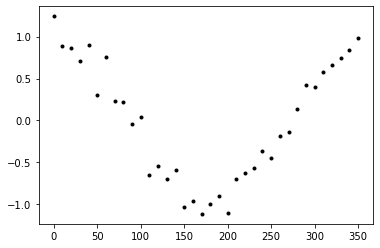

In [150]:
#1. Membuat dataset sederhana

np.random.seed(1)
x = np.arange(0, 360, 10)
y = np.cos(x * np.pi/180) + np.random.normal(0,0.15,len(x))

#2. Dijadikan dalam dataframe dan plot
df_poly = pd.DataFrame({'x':x, 'y':y})
plt.plot(df_poly['x'], df_poly['y'], 'k.')
plt.show()

In [151]:
#3. Melakukan model fitting

from sklearn.linear_model import Lasso, LinearRegression, Ridge

lrp = LinearRegression()
rip = Ridge(alpha=1)
lap = Lasso(alpha=2)

lrp.fit(df_poly[['x']], df_poly['y'])
rip.fit(df_poly[['x']], df_poly['y'])
lap.fit(df_poly[['x']], df_poly['y'])


Lasso(alpha=2)

In [152]:
#4. Melakukan predict dan memasukkan hasilnya ke dalam dataframe

df_poly['linear'] = lrp.predict(df_poly[['x']])
df_poly['ridge'] = rip.predict(df_poly[['x']])
df_poly['lasso'] = lap.predict(df_poly[['x']])

df_poly.head()

,x,y,linear,ridge,lasso
0,0,1.243652,0.080355,0.080354,0.047922
1,10,0.893044,0.074548,0.074548,0.043969
2,20,0.860467,0.068741,0.068741,0.040015
3,30,0.705080,0.062935,0.062934,0.036062
4,40,0.895856,0.057128,0.057128,0.032109


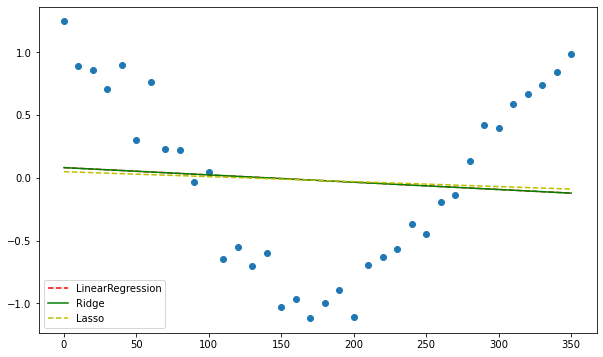

In [153]:
#5. Membuat plot

plt.figure(figsize=(10,6))
plt.scatter(df_poly['x'], df_poly['y'])
plt.plot(df_poly['x'], df_poly['linear'], 'r--', label='LinearRegression')
plt.plot(df_poly['x'], df_poly['ridge'], 'g-', label='Ridge')
plt.plot(df_poly['x'], df_poly['lasso'], 'y--', label='Lasso')
plt.legend()

plt.show()

In [154]:
#6. Mengecek nilai correlation

df_poly[['x', 'y']].corr()

#nilai mendekati 0 berarti tidak linear, jadi pake nomial

,x,y
x,1.000000,-0.085534
y,-0.085534,1.000000


> ### __MODEL 4: Regressi (Linear, Lasso, & Ridge) Dengan Polynomial__

In [155]:
#1. Melakukan polynomial feature

poly = PolynomialFeatures(3, include_bias=False)
feature_poly = poly.fit_transform(df_poly[['x']])

In [156]:
#2. Membuat dataframe hasil polynom

poly_df = pd.DataFrame(feature_poly, columns=poly.get_feature_names())
poly_df['y'] = df_poly['y']

poly_df.head()

,x0,x0^2,x0^3,y
0,0.0,0.0,0.0,1.243652
1,10.0,100.0,1000.0,0.893044
2,20.0,400.0,8000.0,0.860467
3,30.0,900.0,27000.0,0.705080
4,40.0,1600.0,64000.0,0.895856


In [157]:
#3. Melakukan model fitting linear regression dengan fit x0 dan x0^2

lr_poly = LinearRegression().fit(poly_df[['x0', 'x0^2']], poly_df['y'])

In [158]:
#4.Melakukan prediksi dan hasilnya dimasukkan ke dataframe

poly_df['y_pred'] = lr_poly.predict(poly_df[['x0', 'x0^2']])
poly_df.head()

,x0,x0^2,x0^3,y,y_pred
0,0.0,0.0,0.0,1.243652,1.451325
1,10.0,100.0,1000.0,0.893044,1.210495
2,20.0,400.0,8000.0,0.860467,0.983490
3,30.0,900.0,27000.0,0.705080,0.770309
4,40.0,1600.0,64000.0,0.895856,0.570954


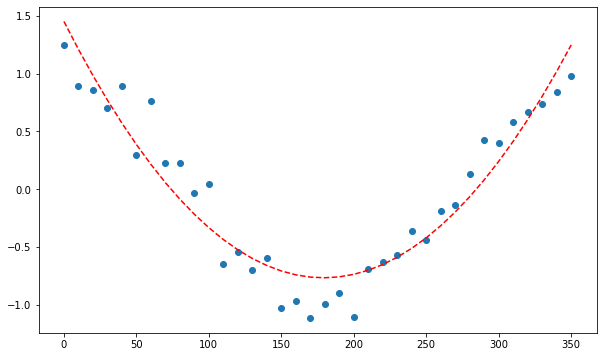

In [159]:
#5. Membuat plot

plt.figure(figsize=(10,6))
plt.scatter(poly_df['x0'], poly_df['y'])
plt.plot(poly_df['x0'], poly_df['y_pred'], 'r--', label='LinearRegression')

plt.show()

########################################################################################

# __Preprocessing Method to Modeling at once Part 2__

__Table Of Contents__
1. Data
1. EDA
1. Missing value Exploration
1. Preprocessing
1. Data Splitting
1. Data Transformation
1. Model fitting and evaluation
1. Model properties

> ### __1. DATA__

An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>
Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
-- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
-- These are the demographics and other 
<br>
features to describe a person

We will explore the possibility in predicting income level based on the individual’s personal information.


In [160]:
#1. Input dataset

adult = pd.read_csv('adult.csv')
adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [161]:
#2. Melihat rasio dari data income (classifikasi)

adult['income'].value_counts(normalize=True)

<=50K    0.75919
>50K     0.24081
Name: income, dtype: float64

> ### __2. EDA__

In [162]:
#3. Melakukan analisa deskriptif

adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [163]:
#4. Melihat info dari dataset

adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


> ### __3. MISSING VALUE__

Missing value in this dataset marked with "?"

In [164]:
#1. ubah data '?' jadi nan

adult.replace('?', np.nan, inplace=True)

In [165]:
#2. Mengecek jumlah data kosong di dataset

adult.isna().sum()/len(adult)

age               0.000000
workclass         0.056386
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.056601
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.017905
income            0.000000
dtype: float64

<AxesSubplot:>

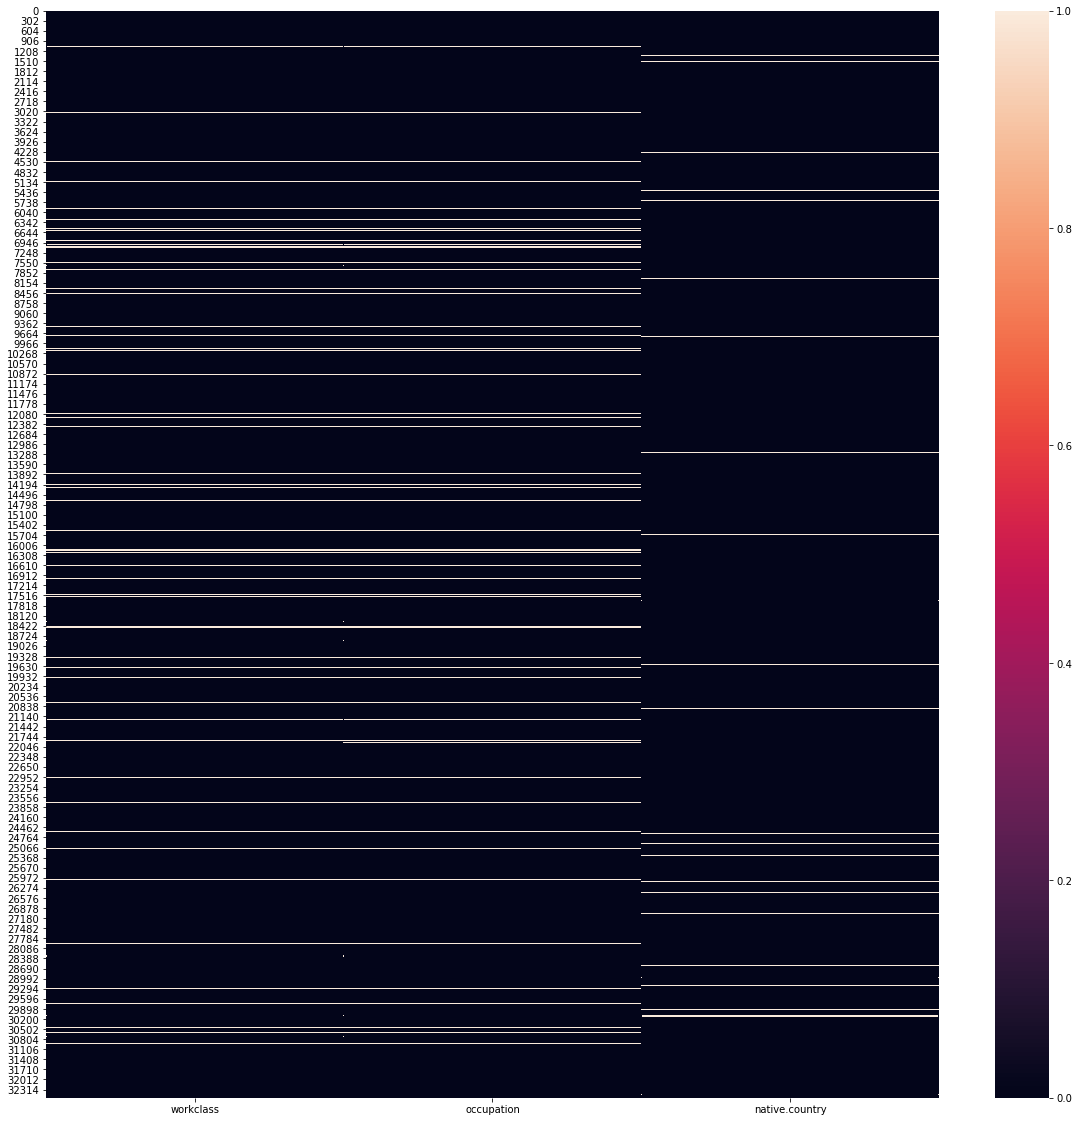

In [166]:
#Melihat jumlah data kosong dengan plot

plt.figure(figsize=(20, 20))
sns.heatmap(adult[['workclass', 'occupation', 'native.country']].isna())

#yang putih2 itu data yg hilang

The Missing Variable:
1. workclass
1. occupation
1. native.country

> ### __4. PREPROCESSING__

In [167]:
# Mencari kolom categorical
categorical_features = adult.columns[adult.dtypes == object]

#Melakukan describe untuk categorical
adult[categorical_features].describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [168]:
#Import library

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

__Preprocess scheme:__
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size

In [169]:
#1. Membuat pipeline imputer dan encoder
binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value = 'NC')),
    ('binary', ce.BinaryEncoder())
])


#2. Membuat columnTransformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
    ('binary_pipe', binary_encoder_pipeline, ['workclass', 'marital.status', 'occupation', 'native.country'])
], remainder='passthrough')

> ### __5. DATA SPLITTING__

In [170]:
#1. Menentukan variabel dependent dan independent

X = adult.drop(columns = ['fnlwgt', 'income', 'education'], axis=1)
y = np.where(adult['income']=='>50K', 1, 0)

In [171]:
#2. Melakukan data splitting

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

> ### __6. DATA TRANSFORMATION__

In [172]:
#Menghitung jumlah x train

len(X_train)

24420

In [173]:
#Melihat data x train

X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
29849,20,Private,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States
30319,20,Private,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,55,United-States
1878,47,State-gov,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,50,United-States
20686,50,Self-emp-not-inc,10,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Female,0,0,40,NaN
26007,39,Private,10,Never-married,Machine-op-inspct,Other-relative,Asian-Pac-Islander,Male,0,0,40,Philippines


In [174]:
#1. Melakukan fitting ke xtrain dan xtest

X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

C:\Users\asus\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [175]:
#2. Dijadikan data frame dari hasil fitting

X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)

X_train_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0


In [176]:
X_train['workclass'].unique()

array(['Private', 'State-gov', 'Self-emp-not-inc', nan, 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [177]:
#Mengecek metode apa saja yg dilakukan ditransformer

transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
 ('binary_pipe',
  Pipeline(steps=[('imputer',
                   SimpleImputer(fill_value='NC', strategy='constant')),
                  ('binary', BinaryEncoder())]),
  ['workclass', 'marital.status', 'occupation', 'native.country']),
 ('remainder', 'passthrough', [0, 2, 8, 9, 10])]

In [178]:
#Mendapatkan feature name dari hasil transformer

transformer.transformers_[0][1].get_feature_names()

array(['x0_Not-in-family', 'x0_Other-relative', 'x0_Own-child',
       'x0_Unmarried', 'x0_Wife', 'x1_Asian-Pac-Islander', 'x1_Black',
       'x1_Other', 'x1_White', 'x2_Male'], dtype=object)

In [179]:


transformer.transformers_[1][1]['binary'].get_feature_names()

['0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6']

In [180]:
#3. Mendapatkan list feature name hasil data transformers

features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary'].get_feature_names() + 'age education.num capital.gain capital.loss hours.per.week'.split()
display(len(features)) #jumlah features
display(features)

36

['x0_Not-in-family',
 'x0_Other-relative',
 'x0_Own-child',
 'x0_Unmarried',
 'x0_Wife',
 'x1_Asian-Pac-Islander',
 'x1_Black',
 'x1_Other',
 'x1_White',
 'x2_Male',
 '0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6',
 'age',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [181]:
#4. dari feature name, kita ubah nama column df-nya

X_train_preprocessed.columns = features
X_test_preprocessed.columns = features

display(X_train_preprocessed)
display(X_test_preprocessed)

,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24415,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,35.0
24416,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,23.0,12.0,0.0,0.0,16.0
24417,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,38.0,11.0,0.0,0.0,40.0
24418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,9.0,0.0,0.0,40.0


,x0_Not-in-family,x0_Other-relative,x0_Own-child,x0_Unmarried,x0_Wife,x1_Asian-Pac-Islander,x1_Black,x1_Other,x1_White,x2_Male,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,22.0,10.0,0.0,0.0,40.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,44.0,14.0,0.0,0.0,35.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,27.0,13.0,0.0,0.0,40.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,54.0,9.0,0.0,0.0,15.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,56.0,8.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8136,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,10.0,594.0,0.0,16.0
8137,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,31.0,10.0,0.0,0.0,30.0
8138,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,30.0,15.0,0.0,0.0,55.0
8139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,37.0,9.0,0.0,0.0,50.0


> ### __7. MODEL FITTING & EVALUATION__

In [182]:
#1. Melakukan model fitting dengan dtc

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(max_depth=3)

In [183]:
#2. Melakukan prediksi

y_pred = model.predict(X_test_preprocessed)

In [184]:
#3. Melakukan model performance: Accuracy

print('Accuracy', accuracy_score(y_test, y_pred))
#didapatkan accuracy sebesar 83,5%

Accuracy 0.8355238914138312


> ### __8. MODEL PROPERTIES__

In [185]:
#1. Membuat tabel importance

importance_table = pd.DataFrame({
    'imp': model.feature_importances_
}, index=features)

importance_table.sort_values('imp', ascending=False) #Sort by nilai imp dari yg terbesar

,imp
1_3,0.472094
capital.gain,0.264498
education.num,0.261116
age,0.002291
3_1,0.000000
2_1,0.000000
2_2,0.000000
2_3,0.000000
2_4,0.000000
3_0,0.000000


Dengan memakai 4 variabel kita sudah dapatkan akurasi 83%

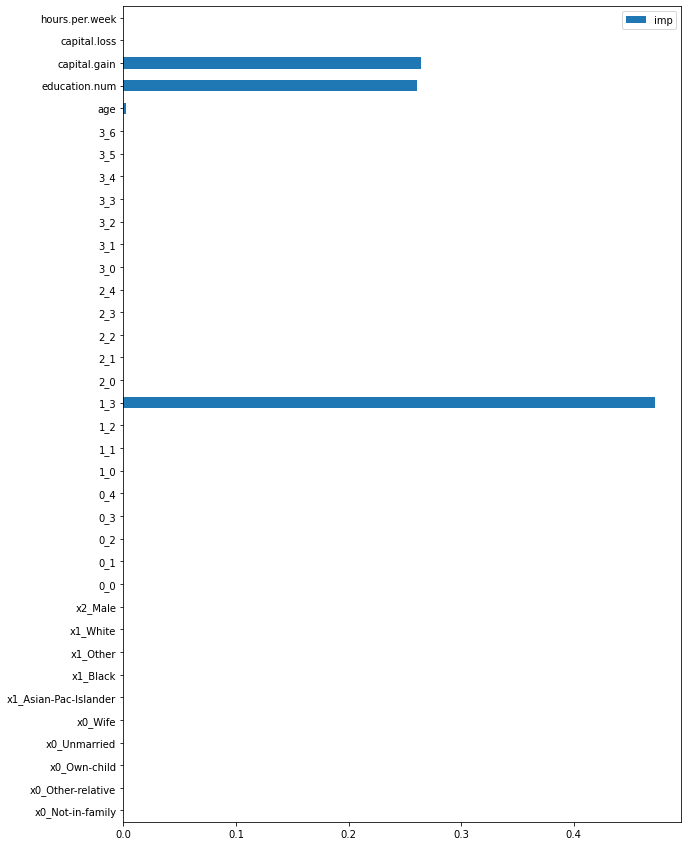

In [186]:
#2. Memvisualisasikan dalam bentuk plot

importance_table.plot(kind='barh', figsize=(10,15))
plt.show()

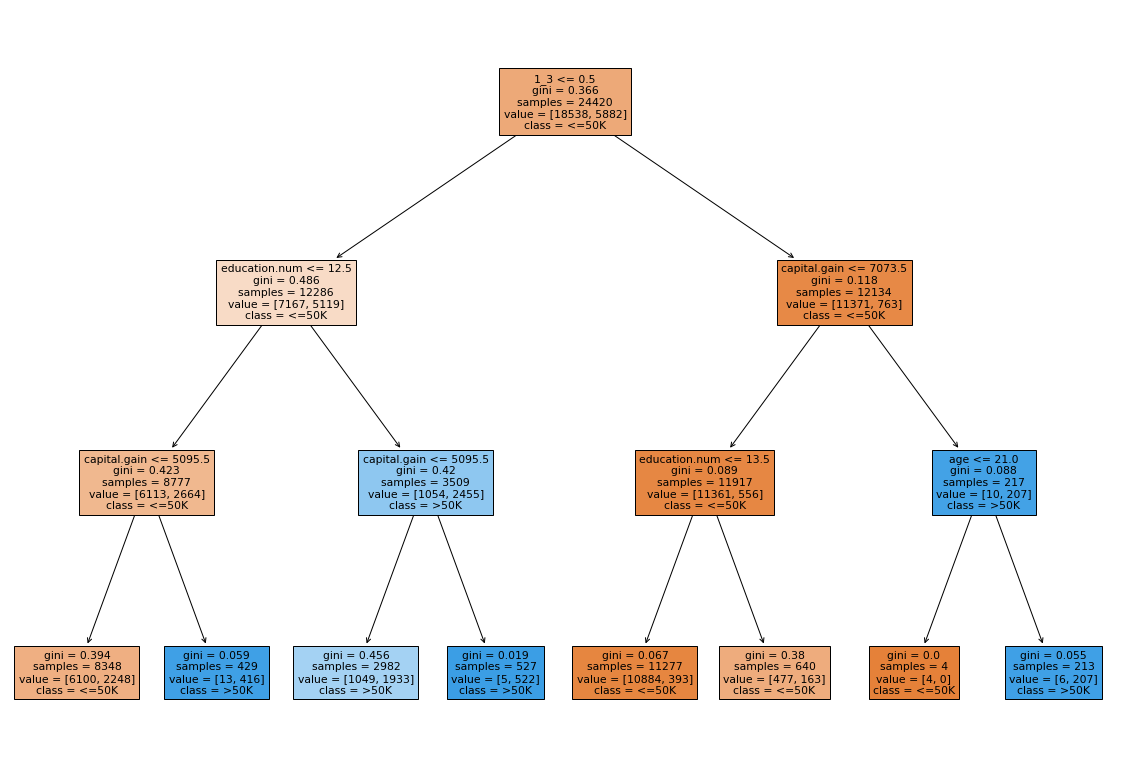

In [187]:
#3. Membuat plot tree

plt.figure(figsize=(20,14))
plot_tree(model, feature_names=features, filled=True, class_names = ['<=50K', '>50K'])
plt.show()

# __FEATURE SELECTION__

## __A. Univariate Feature Selection__

__TABLE OF CONTENT__

1. data transform
1. feature selection : slect percentile
1. model fitting and evaluation : logistic regression

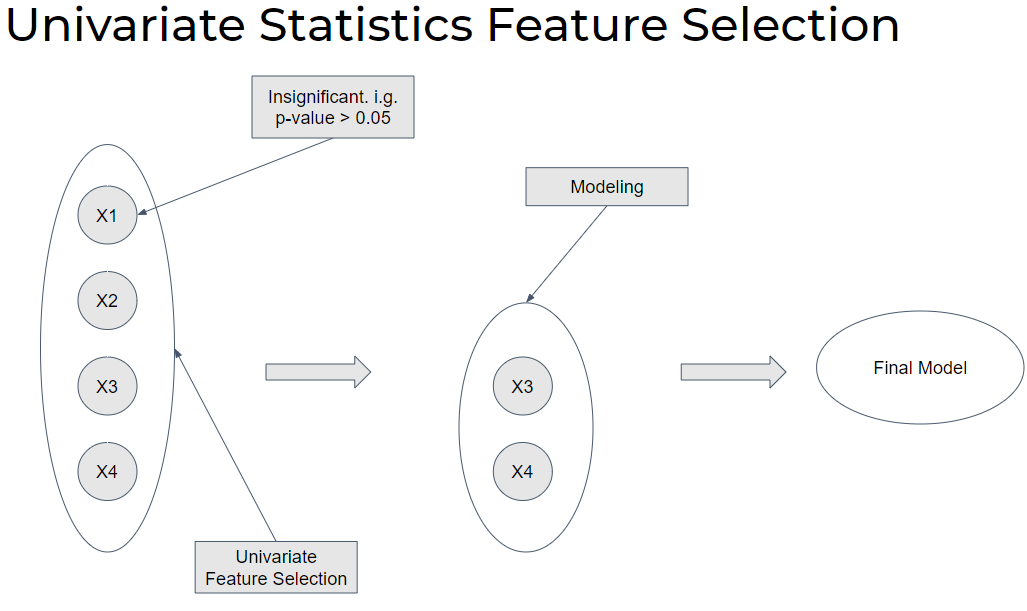

In [188]:
#1. Input dataset

adult = pd.read_csv('adult.csv')
adult.replace('?', np.nan, inplace=True) #ubah data '?' jadi nan

adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [189]:
#2. Membuat pipeline imputer dan encoder
binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value = 'NC')),
    ('binary', ce.BinaryEncoder())
])


#3. Membuat columnTransformer
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['relationship', 'race', 'sex']),
    ('binary_pipe', binary_encoder_pipeline, ['workclass', 'marital.status', 'occupation', 'native.country'])
], remainder='passthrough')

In [190]:
#4. Menentukan variabel dependent dan independent

X = adult.drop(columns = ['fnlwgt', 'income', 'education'], axis=1)
y = np.where(adult['income']=='>50K', 1, 0)

In [191]:
#5. Melakukan data splitting

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

> ### __1. DATA TRANSFORM__

In [192]:
#1. Melakukan fitting ke xtrain dan xtest

X_train_preprocessed = transformer.fit_transform(X_train)
X_test_preprocessed = transformer.transform(X_test)

C:\Users\asus\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [193]:
#2. Dijadikan data frame dari hasil fitting

X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)

X_train_preprocessed.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,20.0,10.0,0.0,0.0,10.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,20.0,9.0,0.0,0.0,55.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,47.0,16.0,15024.0,0.0,50.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,50.0,10.0,0.0,0.0,40.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,39.0,10.0,0.0,0.0,40.0


In [194]:
#3. Mendapatkan list feature name hasil data transformers

features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['binary'].get_feature_names() + 'age education.num capital.gain capital.loss hours.per.week'.split()
display(len(features)) #jumlah features
display(features)

36

['x0_Not-in-family',
 'x0_Other-relative',
 'x0_Own-child',
 'x0_Unmarried',
 'x0_Wife',
 'x1_Asian-Pac-Islander',
 'x1_Black',
 'x1_Other',
 'x1_White',
 'x2_Male',
 '0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '2_3',
 '2_4',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '3_5',
 '3_6',
 'age',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

> ### __2. FEATURE SELECTION__

In [195]:
#1. Melakukan feature selection

from sklearn.feature_selection import SelectPercentile

select = SelectPercentile(percentile=50) #menggunakan percentile 50 == mengambil 1/2 jumlah kolom
select.fit(X_train_preprocessed, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [10 15 19 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\asus\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectPercentile(percentile=50)

In [196]:
#2. Mentransform hasil feature selection

X_train_selected = select.transform(X_train_preprocessed)
X_test_selected = select.transform(X_test_preprocessed)

In [197]:
#3. Membandingkan shape sebelum dan sesudah selection

print('before selection', X_train_preprocessed.shape)
print('after selection', X_train_selected.shape)

before selection (24420, 36)
after selection (24420, 18)


In [198]:
#4. Membuat boolean hasil ... untuk dimasukkan ke dataframe

mask = select.get_support()
mask

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True, False, False, False,  True, False, False,  True,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True])

In [199]:
#5. Membuat dataframe dari hasil 

selected_features = pd.DataFrame({
    'indicator': mask,
    'score': select.scores_,
    'features': features
})

selected_features

,indicator,score,features
0,True,886.311260,x0_Not-in-family
1,True,180.991858,x0_Other-relative
2,True,1347.522879,x0_Own-child
3,True,526.323271,x0_Unmarried
4,True,403.640797,x0_Wife
5,False,2.254091,x1_Asian-Pac-Islander
6,True,208.042370,x1_Black
7,False,23.274255,x1_Other
8,True,188.902365,x1_White
9,True,1170.742103,x2_Male


> ### __3. MODEL FITTING & EVALUATION__

In [200]:
#1. Melakukan model fitting dengan feature selection

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model.fit(X_train_selected, y_train)

print('score', model.score(X_test_selected, y_test)) #sama kayak accuracy

score 0.8383490971625107


In [201]:
#accuracy score sama kayak model.score

                        #y_pred = model.predict(X_test_preprocessed)
accuracy_score(y_test, model.predict(X_test_selected))

0.8383490971625107

In [202]:
#2. Melakukan model fitting dengan tanpa feature selection

model2 = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model2.fit(X_train_preprocessed, y_train)

print('score2', model2.score(X_test_preprocessed, y_test))

score2 0.8398231175531261


__Notes:__
<br> Lebih bagus yg tanpa feature selection univariate, karena univariate tidak melihat korelasi antar variabel.

## __B. Recursive Feature Selection__

Feature selection dimana harus dibuat model terlebih dahulu.
<br> kita pake model2, dimana sudah dilakukan model fitting LogistisRegression

In [203]:
#1. Import Library

from sklearn.feature_selection import RFE

In [204]:
#2. Melakukan feature selection

selector = RFE(model2, n_features_to_select = 10, step=1)
selector.fit(X_train_preprocessed, y_train)
selector.support_

array([ True,  True,  True,  True,  True, False, False,  True, False,
        True, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False])

In [205]:
#3. Membuat dataframe dari hasil

rfe_df = pd.DataFrame({'indicator': selector.support_, 'features': X_train_preprocessed.columns})
rfe_df

,indicator,features
0,True,0
1,True,1
2,True,2
3,True,3
4,True,4
5,False,5
6,False,6
7,True,7
8,False,8
9,True,9


In [206]:
#4. Memilih yg true saja

selected = rfe_df[rfe_df['indicator'] == True]['features']
selected

0      0
1      1
2      2
3      3
4      4
7      7
9      9
11    11
17    17
25    25
Name: features, dtype: int64

In [207]:
#5. Lakukan modelling kembali dengan yg selected

model3 = LogisticRegression(max_iter=1000, solver='liblinear', C=10)
model3.fit(X_train_preprocessed[selected], y_train)

model3.score(X_test_preprocessed[selected], y_test)

0.7592433361994841

__Didapatkan model performance menjadi lebih jelek yaitu 75,9%__